<a href="https://colab.research.google.com/github/Jendma/Academic/blob/main/Data%20Science%20Genom/Project%20UTS/Tugas_UTS_Sains_Data_Genom_Tulus_Setiawan_2006568802.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('BiocManager')
BiocManager::install(version='3.17')
BiocManager::install(c('Biobase','GEOquery'))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'BiocVersion'

Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Installing package(s) 'Biobase', 'GEOquery'

also installing the dependencies ‘R.oo’, ‘R.methodsS3’, ‘BiocGenerics’, ‘limma’, ‘R.utils’


Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'op

In [ ]:
library(Biobase)
library(GEOquery)
library(tidyverse)

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Setting options('download.file.method.GEOquery'='auto')

Setting options('GEOquery.inmemory.gpl'=FALSE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0

# Set Data Sample

In [ ]:
file_path <- "/content/Breast_GSE45827.csv"
data <- read.csv(file_path)

In [ ]:
head(data)
tail(data)

,samples,type,X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,⋯,AFFX.r2.Ec.bioD.3_at,AFFX.r2.Ec.bioD.5_at,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,⋯,12.22971,11.85295,13.65870,13.47770,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
2,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,⋯,12.17853,11.80941,13.75009,13.47015,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
3,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,⋯,12.12511,11.72577,13.62173,13.29508,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
4,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,⋯,12.11123,11.71921,13.74311,13.50886,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
5,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,⋯,12.17364,11.86130,13.79777,13.54221,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
6,92,basal,7.505488,8.802820,6.235074,7.202227,2.987976,7.985281,5.413368,4.465616,⋯,12.28487,12.00069,13.82769,13.53190,6.413184,4.903888,5.070672,2.809652,3.628336,3.117445


,samples,type,X1007_s_at,X1053_at,X117_at,X121_at,X1255_g_at,X1294_at,X1316_at,X1320_at,⋯,AFFX.r2.Ec.bioD.3_at,AFFX.r2.Ec.bioD.5_at,AFFX.r2.P1.cre.3_at,AFFX.r2.P1.cre.5_at,AFFX.ThrX.3_at,AFFX.ThrX.5_at,AFFX.ThrX.M_at,AFFX.TrpnX.3_at,AFFX.TrpnX.5_at,AFFX.TrpnX.M_at
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
146,229,luminal_B,10.35583,7.158921,8.204383,7.055268,3.127653,7.647573,5.406018,4.842870,⋯,12.57875,12.08395,14.16696,14.08572,8.261101,6.505394,7.132860,2.886433,3.567305,3.108688
147,230,luminal_B,10.39264,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,⋯,12.63856,12.12213,14.33115,14.13398,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
148,233,luminal_B,10.93088,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,⋯,12.52351,11.97797,14.28541,14.07099,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
149,236,luminal_B,11.02710,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,⋯,12.25677,11.66113,14.14959,13.97708,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
150,237,luminal_B,10.44439,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,⋯,12.32190,11.72769,14.18628,13.94352,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298
151,238,luminal_B,11.34582,7.379299,5.891172,7.394586,3.183420,7.792885,5.355978,4.457914,⋯,12.12611,11.47889,14.07019,13.85755,7.992141,5.661898,6.460331,3.061585,3.857525,3.129827


In [ ]:
dim(data)
unique(data$type)

[1]   151 54677

[1] "basal"     "HER"       "cell_line" "normal"    "luminal_A" "luminal_B"

In [ ]:
subset_df <- data[data$type %in% c("basal", "HER", "normal", "luminal_A", "luminal_B"), ]

In [ ]:
dim(subset_df)
unique(subset_df$type)

[1]   137 54677

[1] "basal"     "HER"       "normal"    "luminal_A" "luminal_B"

In [ ]:
expdtgeo <- subset_df[, 3:ncol(subset_df)]
expdtgeo <- t(expdtgeo)

head(expdtgeo)

,1,2,3,4,5,6,7,8,9,10,⋯,142,143,144,145,146,147,148,149,150,151
X1007_s_at,9.850040,9.861357,10.103478,9.756875,9.408330,7.505488,10.422371,10.190705,10.256077,9.053138,⋯,10.449338,10.854862,10.747428,10.278358,10.355828,10.392638,10.930875,11.027098,10.444395,11.345817
X1053_at,8.097927,8.212222,8.936137,7.357148,7.746404,8.802820,8.933601,7.813057,7.796936,8.043154,⋯,7.379473,7.382476,7.984658,7.246941,7.158921,7.334408,8.415294,7.180876,7.525153,7.379299
X117_at,6.424728,7.062593,5.735970,6.479183,6.693980,6.235074,5.630488,6.701297,6.725722,7.655891,⋯,6.780362,6.541493,6.286557,6.757624,8.204383,6.848586,5.906827,6.304736,5.964460,5.891172
X121_at,7.353027,7.685578,7.687822,6.986624,7.333426,7.202227,6.881770,6.921350,7.098550,6.900599,⋯,6.954844,7.095581,7.227807,7.363606,7.055268,7.020486,7.753572,7.641197,7.825939,7.394586
X1255_g_at,3.029122,3.149468,3.125931,3.181638,3.169923,2.987976,3.097372,3.140037,3.139031,2.988920,⋯,3.108536,3.068560,3.115704,3.251219,3.127653,3.228065,3.270557,3.206950,3.384147,3.183420
X1294_at,6.880079,7.542283,6.562369,7.802344,7.610457,7.985281,6.273211,7.524231,6.885392,7.669423,⋯,7.496748,7.906729,7.306909,8.469866,7.647573,7.815439,7.367931,8.569296,7.268454,7.792885


In [ ]:
colnames(expdtgeo) <- subset_df$samples

dim(expdtgeo)
head(expdtgeo)

[1] 54675   137

,84,85,87,90,91,92,93,94,99,101,⋯,218,219,226,227,229,230,233,236,237,238
X1007_s_at,9.850040,9.861357,10.103478,9.756875,9.408330,7.505488,10.422371,10.190705,10.256077,9.053138,⋯,10.449338,10.854862,10.747428,10.278358,10.355828,10.392638,10.930875,11.027098,10.444395,11.345817
X1053_at,8.097927,8.212222,8.936137,7.357148,7.746404,8.802820,8.933601,7.813057,7.796936,8.043154,⋯,7.379473,7.382476,7.984658,7.246941,7.158921,7.334408,8.415294,7.180876,7.525153,7.379299
X117_at,6.424728,7.062593,5.735970,6.479183,6.693980,6.235074,5.630488,6.701297,6.725722,7.655891,⋯,6.780362,6.541493,6.286557,6.757624,8.204383,6.848586,5.906827,6.304736,5.964460,5.891172
X121_at,7.353027,7.685578,7.687822,6.986624,7.333426,7.202227,6.881770,6.921350,7.098550,6.900599,⋯,6.954844,7.095581,7.227807,7.363606,7.055268,7.020486,7.753572,7.641197,7.825939,7.394586
X1255_g_at,3.029122,3.149468,3.125931,3.181638,3.169923,2.987976,3.097372,3.140037,3.139031,2.988920,⋯,3.108536,3.068560,3.115704,3.251219,3.127653,3.228065,3.270557,3.206950,3.384147,3.183420
X1294_at,6.880079,7.542283,6.562369,7.802344,7.610457,7.985281,6.273211,7.524231,6.885392,7.669423,⋯,7.496748,7.906729,7.306909,8.469866,7.647573,7.815439,7.367931,8.569296,7.268454,7.792885


In [ ]:
set.seed(2006568802)
n_rows <- nrow(expdtgeo)
n_sample <- round(n_rows * 0.5)
sample_indices <- sample(1:n_rows, n_sample)

expdtgeo <- expdtgeo[sample_indices, ]

dim(expdtgeo)
head(expdtgeo)

[1] 27338   137

,84,85,87,90,91,92,93,94,99,101,⋯,218,219,226,227,229,230,233,236,237,238
X206747_at,7.144405,5.885745,6.115509,7.211866,6.921872,6.087174,8.994000,6.928406,6.875382,7.168934,⋯,6.002850,5.706489,6.151975,6.544403,5.981687,6.074226,6.306205,5.753045,6.116754,5.835276
X222006_at,7.319156,7.255219,7.054015,7.344616,7.614603,7.118223,7.162885,6.988333,7.375883,7.098236,⋯,7.291526,7.359573,7.723559,7.181259,7.110208,7.760325,7.521304,7.553498,7.123442,7.200169
X1558698_at,6.177683,5.866105,5.546032,5.879021,6.276558,5.494788,5.812657,5.844945,5.823175,5.566111,⋯,5.397230,5.348148,5.722098,5.535774,5.400820,5.541149,5.795336,5.540666,5.540559,5.381651
X1569894_at,4.066117,4.039812,4.602512,3.810201,4.450978,4.342888,4.107683,3.778732,4.378014,4.136744,⋯,4.570292,4.578340,4.452525,4.718796,4.632685,4.604328,4.609972,4.254127,4.456580,4.289181
X1568957_x_at,4.889704,4.502283,4.542974,4.518518,4.523013,6.188652,5.120202,5.254290,4.868326,4.299048,⋯,4.130373,4.563153,4.193974,4.192415,5.479009,4.055713,4.486376,5.082811,4.716782,4.373753
X216260_at,3.484739,3.676836,3.487385,3.809341,3.474081,3.799240,3.133891,3.842205,3.624320,3.393515,⋯,4.682472,3.724393,3.584195,3.397390,4.551525,3.483806,7.176039,3.669758,3.881867,4.274622


# Eksplorasi

## Normalisasi Sample Data Gen

In [ ]:
head(expdtgeo)

range_before <- c(min(expdtgeo, na.rm = TRUE),max(expdtgeo, na.rm = TRUE))
cat("Nilai maksimal-minimal data sebelum normalisasi\n")
print(range_before)

,84,85,87,90,91,92,93,94,99,101,⋯,218,219,226,227,229,230,233,236,237,238
X206747_at,7.144405,5.885745,6.115509,7.211866,6.921872,6.087174,8.994000,6.928406,6.875382,7.168934,⋯,6.002850,5.706489,6.151975,6.544403,5.981687,6.074226,6.306205,5.753045,6.116754,5.835276
X222006_at,7.319156,7.255219,7.054015,7.344616,7.614603,7.118223,7.162885,6.988333,7.375883,7.098236,⋯,7.291526,7.359573,7.723559,7.181259,7.110208,7.760325,7.521304,7.553498,7.123442,7.200169
X1558698_at,6.177683,5.866105,5.546032,5.879021,6.276558,5.494788,5.812657,5.844945,5.823175,5.566111,⋯,5.397230,5.348148,5.722098,5.535774,5.400820,5.541149,5.795336,5.540666,5.540559,5.381651
X1569894_at,4.066117,4.039812,4.602512,3.810201,4.450978,4.342888,4.107683,3.778732,4.378014,4.136744,⋯,4.570292,4.578340,4.452525,4.718796,4.632685,4.604328,4.609972,4.254127,4.456580,4.289181
X1568957_x_at,4.889704,4.502283,4.542974,4.518518,4.523013,6.188652,5.120202,5.254290,4.868326,4.299048,⋯,4.130373,4.563153,4.193974,4.192415,5.479009,4.055713,4.486376,5.082811,4.716782,4.373753
X216260_at,3.484739,3.676836,3.487385,3.809341,3.474081,3.799240,3.133891,3.842205,3.624320,3.393515,⋯,4.682472,3.724393,3.584195,3.397390,4.551525,3.483806,7.176039,3.669758,3.881867,4.274622


Nilai maksimal-minimal data sebelum normalisasi
[1]  2.1711 14.9701


In [ ]:
expdtgeo_norm <- log2(expdtgeo)
head(expdtgeo_norm)

range_after <- c(min(expdtgeo_norm, na.rm = TRUE),max(expdtgeo_norm, na.rm = TRUE))
cat("Nilai maksimal-minimal data setelah normalisasi\n")
print(range_after)

,84,85,87,90,91,92,93,94,99,101,⋯,218,219,226,227,229,230,233,236,237,238
X206747_at,2.836814,2.557225,2.612473,2.850373,2.791162,2.605773,3.168963,2.792524,2.781440,2.841759,⋯,2.585648,2.512603,2.621050,2.710261,2.580552,2.602701,2.656772,2.524326,2.612766,2.544801
X222006_at,2.871677,2.859019,2.818445,2.876687,2.928769,2.831517,2.840541,2.804948,2.882816,2.827461,⋯,2.866221,2.879622,2.949266,2.844237,2.829892,2.956117,2.910983,2.917145,2.832574,2.848031
X1558698_at,2.627066,2.552403,2.471456,2.555576,2.649974,2.458064,2.539198,2.547190,2.541806,2.476670,⋯,2.432219,2.419039,2.516544,2.468785,2.433179,2.470185,2.534892,2.470059,2.470031,2.428049
X1569894_at,2.023652,2.014288,2.202421,1.929867,2.154122,2.118655,2.038325,1.917902,2.130277,2.048496,⋯,2.192286,2.194825,2.154624,2.238419,2.211849,2.202991,2.204758,2.088863,2.155937,2.100702
X1568957_x_at,2.289747,2.170657,2.183637,2.175850,2.177284,2.629625,2.356201,2.393496,2.283426,2.104017,⋯,2.046272,2.190031,2.068318,2.067782,2.453915,2.019955,2.165550,2.345627,2.237803,2.128872
X216260_at,1.801050,1.878465,1.802146,1.929541,1.796631,1.925711,1.647955,1.941934,1.857710,1.762780,⋯,2.227270,1.897005,1.841649,1.764427,2.186350,1.800664,2.843188,1.875685,1.956751,2.095797


Nilai maksimal-minimal data setelah normalisasi
[1] 1.118426 3.904012


## Gene Filtering

In [ ]:
#duplicated filter
expdtgeoFilt <- expdtgeo_norm[!duplicated(expdtgeo_norm), ]

iqr_values <- apply(expdtgeoFilt, 1, IQR)

# Filter rows based on IQR values
expdtgeoFilt <- expdtgeoFilt[iqr_values > quantile(iqr_values, 0.5), ]
dim(expdtgeoFilt)

[1] 13669   137

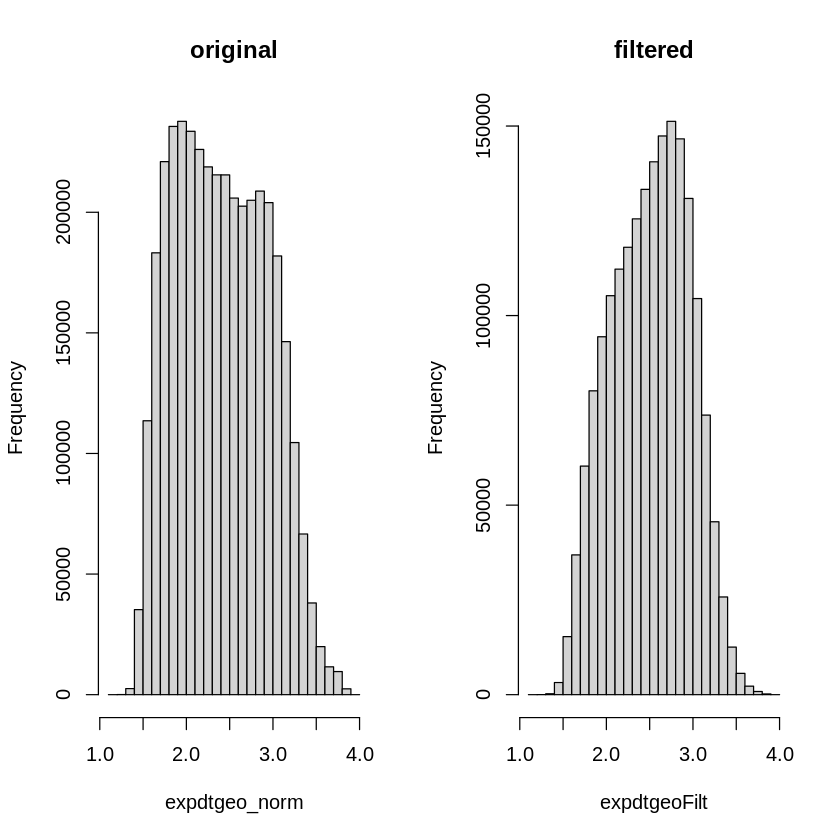

In [ ]:
par(mfrow=c(1,2))
hist(expdtgeo_norm, main='original')
hist(expdtgeoFilt, main='filtered')

# Gene Expression (4 subtype cancer)

In [ ]:
vargrp <- subset_df[,2]
table(vargrp)

vargrp
    basal       HER luminal_A luminal_B    normal 
       41        30        29        30         7 

In [ ]:
subtype_cancer_idx <- ifelse(vargrp %in% c('basal', 'HER', 'luminal_A', 'luminal_B'),
                         0, 1)
subtype_cancer <- vargrp[subtype_cancer_idx == 0]

group_subtype_cancer <- ifelse(subtype_cancer == "basal", 0,
                       ifelse(subtype_cancer == "HER", 1,
                              ifelse(subtype_cancer == "luminal_A", 2, 3)))
cat("Kategori sub-cancer:\n")
subtype_cancer
cat("\n")
cat("Grup sub-cancer:\n")
group_subtype_cancer

Kategori sub-cancer:


[1] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
  [7] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [13] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [19] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [25] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [31] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [37] "basal"     "basal"     "basal"     "basal"     "basal"     "HER"      
 [43] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [49] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [55] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [61] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [67] "HER"       "HER"       "HER"       "HER"       "HER"       "luminal_A"
 [73] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
 [79] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
 [85] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
 [91] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
 [97] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_B" "luminal_B"
[103] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[109] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[115] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[121] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[127] "luminal_B" "luminal_B" "luminal_B" "luminal_B"


Grup sub-cancer:


[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [38] 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3
[112] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [ ]:
expdtgeo_sc = expdtgeoFilt[, subtype_cancer_idx==0]
head(expdtgeo_sc)

,84,85,87,90,91,92,93,94,99,101,⋯,218,219,226,227,229,230,233,236,237,238
X206747_at,2.836814,2.557225,2.612473,2.850373,2.791162,2.605773,3.168963,2.792524,2.781440,2.841759,⋯,2.585648,2.512603,2.621050,2.710261,2.580552,2.602701,2.656772,2.524326,2.612766,2.544801
X1569894_at,2.023652,2.014288,2.202421,1.929867,2.154122,2.118655,2.038325,1.917902,2.130277,2.048496,⋯,2.192286,2.194825,2.154624,2.238419,2.211849,2.202991,2.204758,2.088863,2.155937,2.100702
X1568957_x_at,2.289747,2.170657,2.183637,2.175850,2.177284,2.629625,2.356201,2.393496,2.283426,2.104017,⋯,2.046272,2.190031,2.068318,2.067782,2.453915,2.019955,2.165550,2.345627,2.237803,2.128872
X225863_s_at,3.101780,3.044453,2.991648,3.116145,3.045576,3.045698,3.089326,3.099421,3.015979,3.028218,⋯,3.011015,2.979569,2.993018,2.973859,2.999824,2.792327,2.935459,2.963615,2.824416,2.845670
X222326_at,3.244146,3.106944,2.402531,2.549274,2.627179,2.493806,2.216407,2.889964,2.433534,2.947988,⋯,2.664826,2.841296,2.144857,2.617518,2.210780,2.459534,2.089733,2.411535,2.365938,2.208355
X1567997_x_at,1.958072,1.904884,2.105247,2.001128,2.105797,2.043259,2.100294,1.894772,1.912652,1.908888,⋯,2.334906,2.405866,2.984212,2.083547,2.351992,2.327427,2.998348,2.006181,2.610614,2.572016


In [ ]:
BiocManager::install('limma')

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.rstudio.com

Bioconductor version 3.17 (BiocManager 1.30.22), R 4.3.1 (2023-06-16)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'limma'”
Old packages: 'bit', 'curl', 'devtools', 'gargle', 'highr', 'isoband',
  'openssl', 'ragg', 'roxygen2', 'textshaping', 'whisker', 'boot'



In [ ]:
library(limma)
design <- model.matrix(~group_subtype_cancer)
fit <- eBayes(lmFit(expdtgeo_sc,design))
fit


Attaching package: ‘limma’


The following object is masked from ‘package:BiocGenerics’:

    plotMA




An object of class "MArrayLM"
$coefficients
              (Intercept) group_subtype_cancer
X206747_at       2.817905          -0.07164284
X1569894_at      2.152195          -0.00433777
X1568957_x_at    2.172403          -0.02592027
X225863_s_at     2.928395          -0.01347184
X222326_at       2.674267          -0.13108331
13664 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
  (Intercept) group_subtype_cancer
1 -11.4017543          -15.6116327
2   0.0877058           13.1254304
3   0.0877058            0.0959073
4   0.0877058            0.0959073
5   0.0877058            0.0959073
125 more rows ...

$qraux
[1] 1.087706 1.095907

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 128 128 128 128 128
13664 more elements ...

$sigma
   X206747_at   X1569894_at X1568957_x_at  X225863_s_at    X222326_at 
   0.11720166    0.09839925    0.14242587    0.12091452    0.33447426 
13664 more elements ...

$cov.coefficients
                      (Intercept) group_subtype_cancer
(

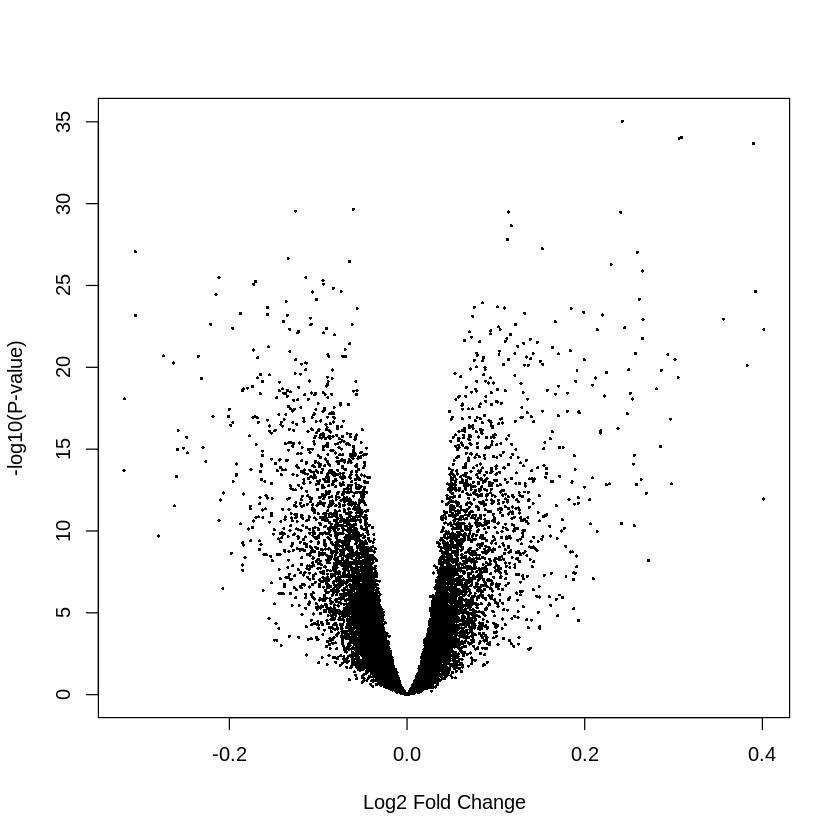

In [ ]:
volcanoplot(fit, coef=2)

In [ ]:
topResult <- topTable(fit, coef=2, number=20)

rownames(topResult)

[1] "X210085_s_at"  "X233388_at"    "X204508_s_at"  "X205225_at"   
 [5] "X210466_s_at"  "X228673_s_at"  "X204862_s_at"  "X218211_s_at" 
 [9] "X218394_at"    "X202908_at"    "X223103_at"    "X219497_s_at" 
[13] "X210735_s_at"  "X244689_at"    "X1555760_a_at" "X203571_s_at" 
[17] "X209603_at"    "X210092_at"    "X225612_s_at"  "X203692_s_at"

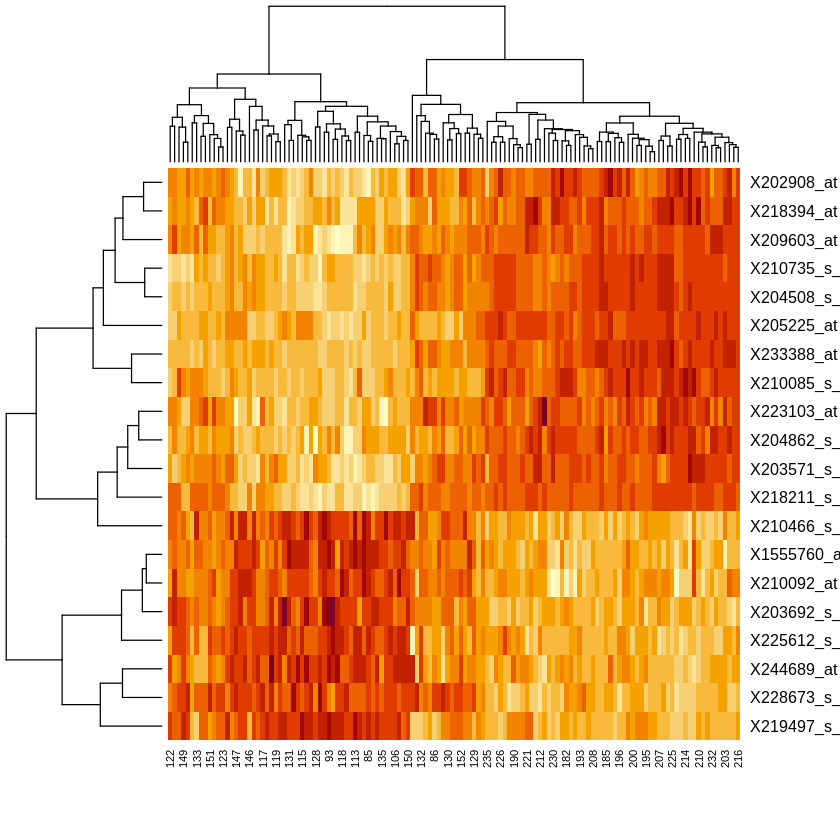

In [ ]:
selected <- rownames(expdtgeo_sc) %in% rownames(topResult)
expdtgeosel <- expdtgeo_sc [selected, ]

heatmap(expdtgeosel)

Keterangan untuk axis group_subtype_cancer:

     0.0: basal

     1.0: HER

     2.0: luminal_A

     3.0: luminal_B

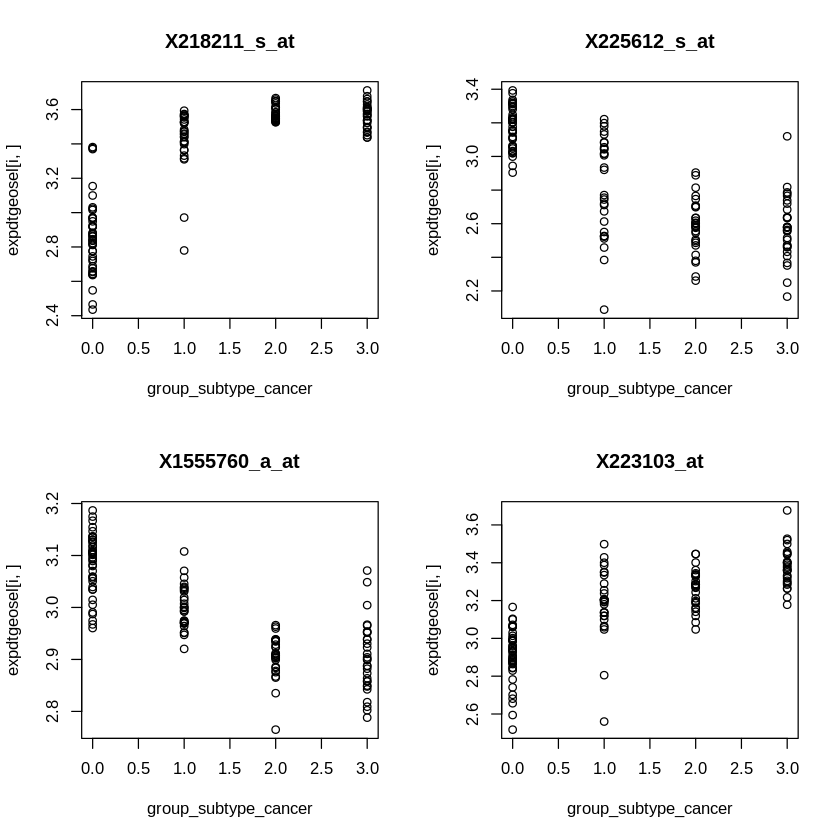

In [ ]:
par(mfrow=c(2,2))
for (i in 1:4) plot(group_subtype_cancer, expdtgeosel[i,],
    main = rownames(expdtgeosel)[i])

cat("Keterangan untuk axis group_subtype_cancer:\n
     0.0: basal\n
     1.0: HER\n
     2.0: luminal_A\n
     3.0: luminal_B")

# Gene Expression (gen normal v gen subtype cancer)

## gen normal v gen cancer HER

In [ ]:
normal_cancer_idx <- ifelse(vargrp %in% c('normal', 'HER'), 0, 1)
normal_cancer <- vargrp[normal_cancer_idx == 0]

group_normal_cancer <- ifelse(normal_cancer == "normal", 0, 1)

cat("Kategori normal_cancer:\n")
normal_cancer
cat("\n")
cat("Grup normal_cancer:\n")
group_normal_cancer

Kategori normal_cancer:


[1] "HER"    "HER"    "HER"    "HER"    "HER"    "HER"    "HER"    "HER"   
 [9] "HER"    "HER"    "HER"    "HER"    "HER"    "HER"    "HER"    "HER"   
[17] "HER"    "HER"    "HER"    "HER"    "HER"    "HER"    "HER"    "HER"   
[25] "HER"    "HER"    "HER"    "HER"    "HER"    "HER"    "normal" "normal"
[33] "normal" "normal" "normal" "normal" "normal"


Grup normal_cancer:


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0

In [ ]:
expdtgeo_nc = expdtgeoFilt[, normal_cancer_idx==0]
head(expdtgeo_nc)

,86,88,89,95,96,97,98,100,103,104,⋯,152,153,154,171,172,173,174,175,177,178
X206747_at,2.705738,2.609896,2.738584,2.541651,2.827880,2.487099,2.535451,2.659131,2.767236,2.421851,⋯,2.878934,2.711958,2.903587,2.714007,2.750805,2.805268,2.896679,2.840332,2.846690,2.897229
X1569894_at,2.145994,2.473098,2.188431,2.117582,2.058352,2.105271,2.145913,2.167475,2.125418,2.351594,⋯,2.187091,2.196581,2.157590,2.035906,2.017294,2.062814,2.056230,2.007935,2.011974,2.128853
X1568957_x_at,2.395815,2.149564,2.304951,2.189385,2.201818,2.168679,2.356400,1.927573,2.062320,2.158428,⋯,2.100502,1.961971,2.156946,1.992170,1.983114,1.955903,1.749439,1.950629,1.866450,1.930255
X225863_s_at,2.976693,2.925706,3.009354,2.823717,3.018575,2.925574,2.930837,2.808422,2.973814,2.932832,⋯,2.853660,2.735904,2.886442,3.223156,2.991927,2.915192,2.552780,2.762807,2.972907,2.731500
X222326_at,2.492181,2.330770,2.986910,2.814767,2.999239,2.721242,2.586712,2.961990,2.795547,2.537258,⋯,2.969500,2.751948,3.149447,1.890914,2.430213,2.457098,2.262843,2.457255,2.099031,2.488216
X1567997_x_at,2.043384,1.865348,2.020231,1.942024,2.167966,2.132525,2.121801,2.006269,2.181244,2.030885,⋯,2.076494,2.255866,2.178726,2.077475,2.376328,2.514693,2.566187,2.376874,2.321740,2.258999


[1] 3.670493e-30

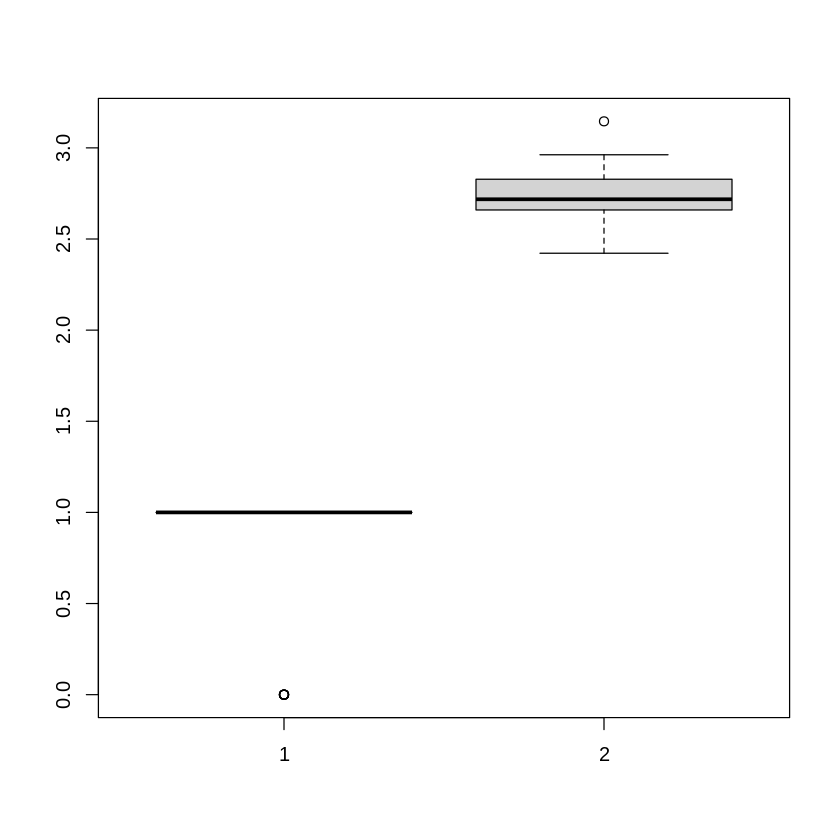

In [ ]:
t.test(group_normal_cancer, expdtgeo_nc[1,])$p.value
boxplot(group_normal_cancer, expdtgeo_nc[1,])

[1] 13669

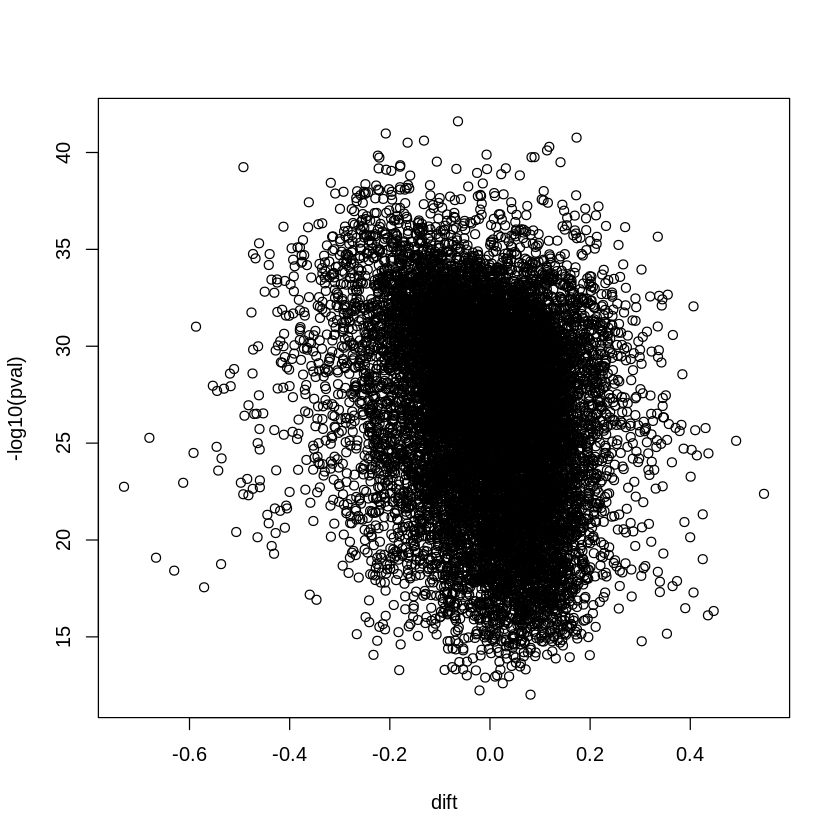

In [ ]:
pval <- apply(expdtgeo_nc, 1, function(x) t.test(group_normal_cancer, x)$p.value)
dift <- apply(expdtgeo_nc, 1, function(x) diff(t.test(x[1:7], x[8:38])$estimate))
plot(dift, -log10(pval))
sum(pval < 0.05)

[1] 13669

[1] 13669

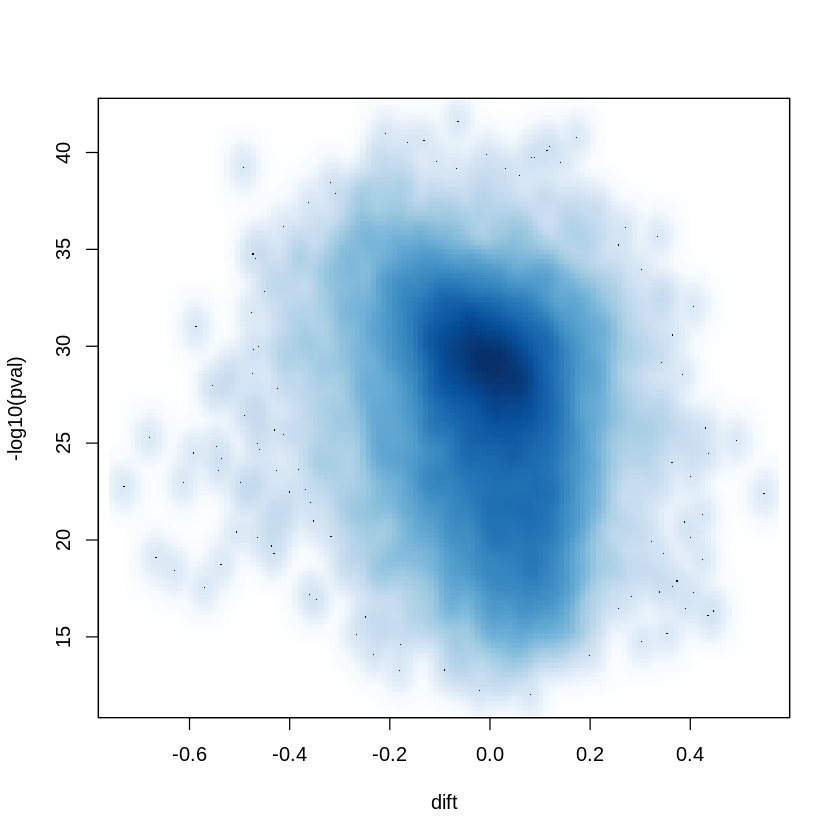

In [ ]:
library(RColorBrewer)

smoothScatter(dift, -log10(pval))

sum(pval < 0.05)
pvalBonf <- p.adjust(pval, method = "bonferroni" )

sum(pvalBonf < 0.05)

In [ ]:
design <- model.matrix(~group_normal_cancer)

fit <- eBayes(lmFit(expdtgeo_nc, design))

fit

An object of class "MArrayLM"
$coefficients
              (Intercept) group_normal_cancer
X206747_at       2.821573        -0.100238209
X1569894_at      2.045858         0.132756339
X1568957_x_at    1.918280         0.218395866
X225863_s_at     2.878610        -0.004100542
X222326_at       2.297939         0.449539864
13664 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
  (Intercept) group_normal_cancer
1   -6.082763         -4.93196962
2    0.164399         -2.38236766
3    0.164399          0.06820021
4    0.164399          0.06820021
5    0.164399          0.06820021
32 more rows ...

$qraux
[1] 1.164399 1.068200

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 35 35 35 35 35
13664 more elements ...

$sigma
   X206747_at   X1569894_at X1568957_x_at  X225863_s_at    X222326_at 
   0.14194932    0.09852289    0.11351637    0.15002421    0.23965530 
13664 more elements ...

$cov.coefficients
                    (Intercept) group_normal_cancer
(Intercept)           

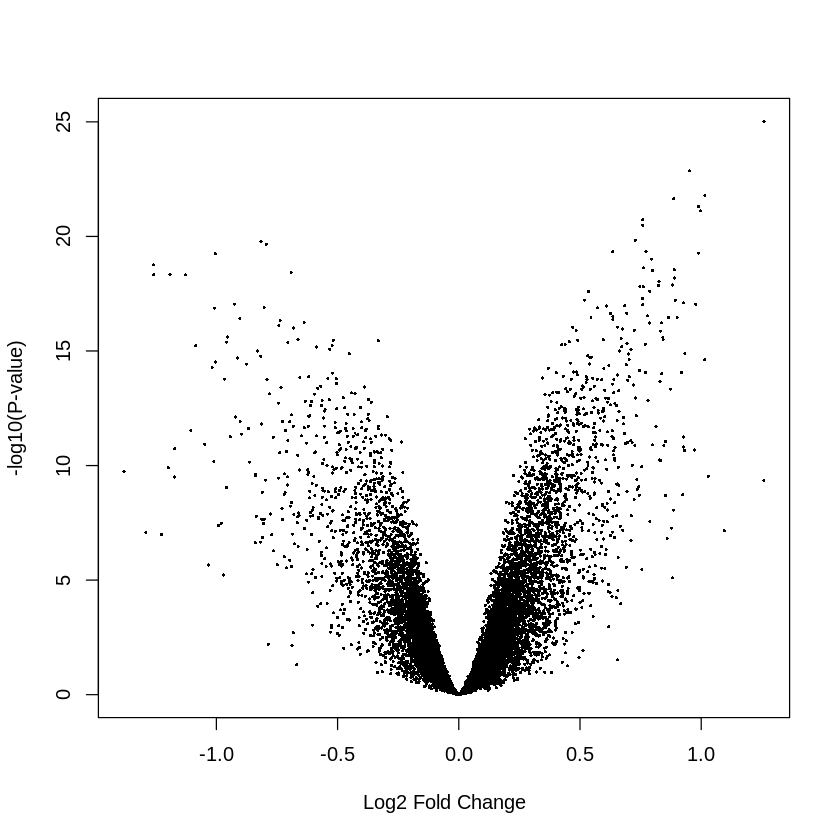

In [ ]:
volcanoplot(fit, coef=2)

In [ ]:
topResult_normal <- topTable(fit, coef=2, number=20)

rownames(topResult_normal)

[1] "X209773_s_at"  "X219918_s_at"  "X225687_at"    "X218039_at"   
 [5] "X1552619_a_at" "X201890_at"    "X219787_s_at"  "X225655_at"   
 [9] "X207165_at"    "X213451_x_at"  "X206093_x_at"  "X1558080_s_at"
[13] "X212021_s_at"  "X229490_s_at"  "X1561754_at"   "X218585_s_at" 
[17] "X223623_at"    "X210052_s_at"  "X215646_s_at"  "X1560342_at"

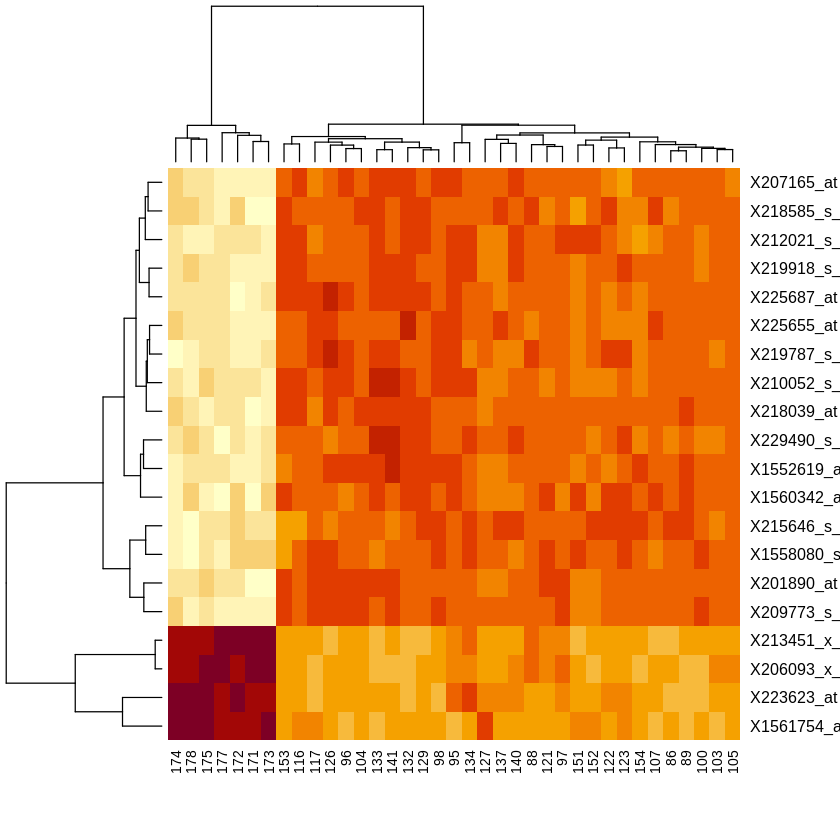

In [ ]:
selected <- rownames(expdtgeo_nc) %in% rownames(topResult_normal)
expdtgeosel <- expdtgeo_nc[selected, ]

heatmap(expdtgeosel)

Keterangan untuk axis group_subtype_cancer:

     0.0: normal

     1.0: HER

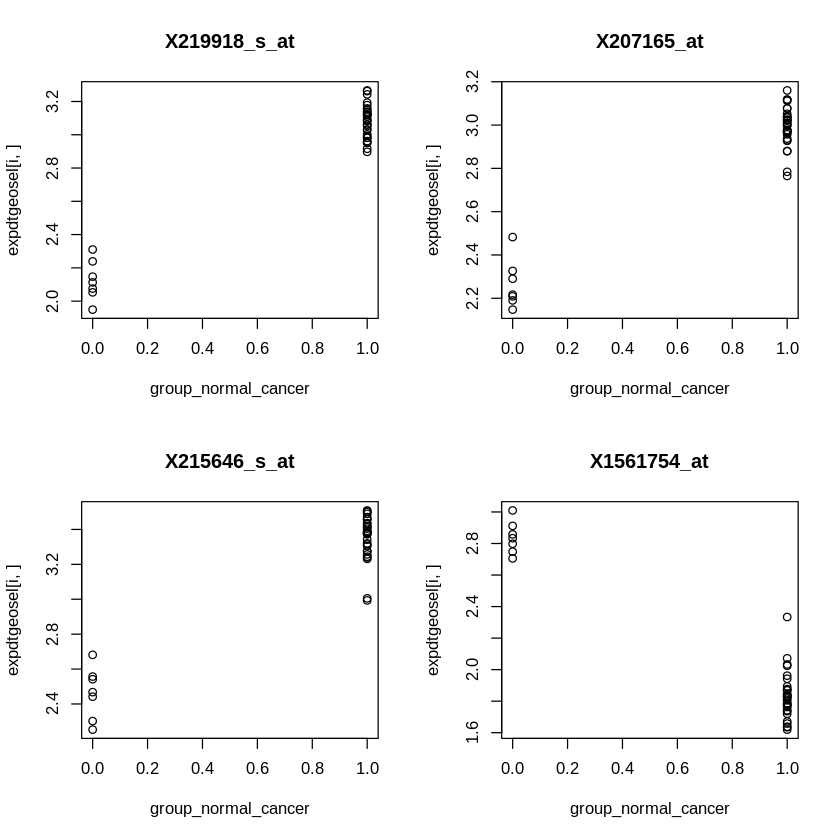

In [ ]:
par(mfrow=c(2,2))
for (i in 1:4) plot(group_normal_cancer, expdtgeosel[i,],
    main = rownames(expdtgeosel)[i])

cat("Keterangan untuk axis group_subtype_cancer:\n
     0.0: normal\n
     1.0: HER")

## gen normal v gen cancer basal

In [ ]:
normal_cancer_idx <- ifelse(vargrp %in% c('normal', 'basal'),
                         0, 1)
normal_cancer <- vargrp[normal_cancer_idx == 0]

group_normal_cancer <- ifelse(normal_cancer == "normal", 0, 1)

cat("Kategori normal_cancer:\n")
normal_cancer
cat("\n")
cat("Grup normal_cancer:\n")
group_normal_cancer

Kategori normal_cancer:


[1] "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal" 
 [9] "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal" 
[17] "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal" 
[25] "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal" 
[33] "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal"  "basal" 
[41] "basal"  "normal" "normal" "normal" "normal" "normal" "normal" "normal"


Grup normal_cancer:


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 0 0 0 0 0 0 0

In [ ]:
expdtgeo_nc = expdtgeoFilt[, normal_cancer_idx==0]
head(expdtgeo_nc)

,84,85,87,90,91,92,93,94,99,101,⋯,148,149,150,171,172,173,174,175,177,178
X206747_at,2.836814,2.557225,2.612473,2.850373,2.791162,2.605773,3.168963,2.792524,2.781440,2.841759,⋯,2.931639,2.932853,2.969711,2.714007,2.750805,2.805268,2.896679,2.840332,2.846690,2.897229
X1569894_at,2.023652,2.014288,2.202421,1.929867,2.154122,2.118655,2.038325,1.917902,2.130277,2.048496,⋯,1.998809,2.154420,2.071643,2.035906,2.017294,2.062814,2.056230,2.007935,2.011974,2.128853
X1568957_x_at,2.289747,2.170657,2.183637,2.175850,2.177284,2.629625,2.356201,2.393496,2.283426,2.104017,⋯,2.047915,2.027527,1.908830,1.992170,1.983114,1.955903,1.749439,1.950629,1.866450,1.930255
X225863_s_at,3.101780,3.044453,2.991648,3.116145,3.045576,3.045698,3.089326,3.099421,3.015979,3.028218,⋯,2.918999,2.833960,2.864449,3.223156,2.991927,2.915192,2.552780,2.762807,2.972907,2.731500
X222326_at,3.244146,3.106944,2.402531,2.549274,2.627179,2.493806,2.216407,2.889964,2.433534,2.947988,⋯,3.076878,1.974736,2.235109,1.890914,2.430213,2.457098,2.262843,2.457255,2.099031,2.488216
X1567997_x_at,1.958072,1.904884,2.105247,2.001128,2.105797,2.043259,2.100294,1.894772,1.912652,1.908888,⋯,1.957529,2.237484,1.918399,2.077475,2.376328,2.514693,2.566187,2.376874,2.321740,2.258999


[1] 3.880977e-42

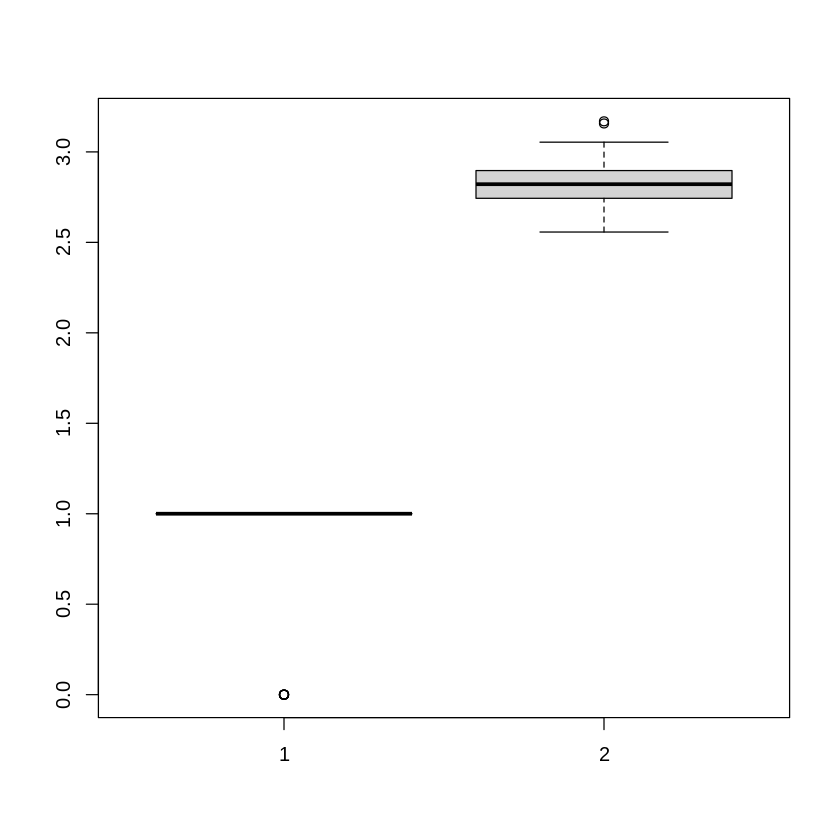

In [ ]:
t.test(group_normal_cancer, expdtgeo_nc[1,])$p.value
boxplot(group_normal_cancer, expdtgeo_nc[1,])

[1] 13669

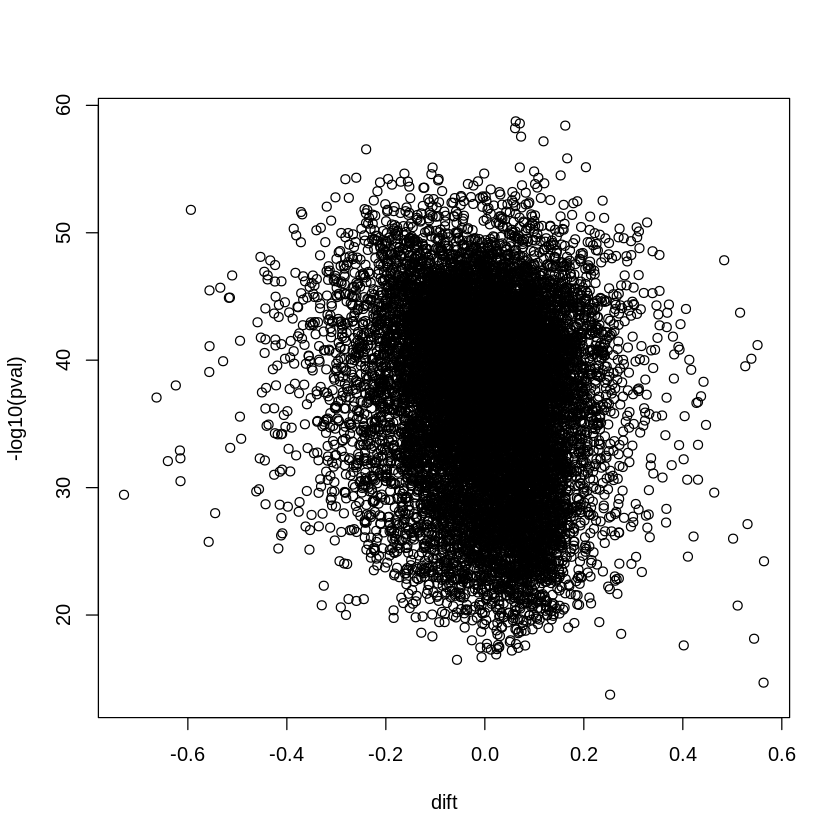

In [ ]:
pval <- apply(expdtgeo_nc, 1, function(x) t.test(group_normal_cancer, x)$p.value)
dift <- apply(expdtgeo_nc, 1, function(x) diff(t.test(x[1:7], x[8:49])$estimate))
plot(dift, -log10(pval))
sum(pval < 0.05)

[1] 13669

[1] 13669

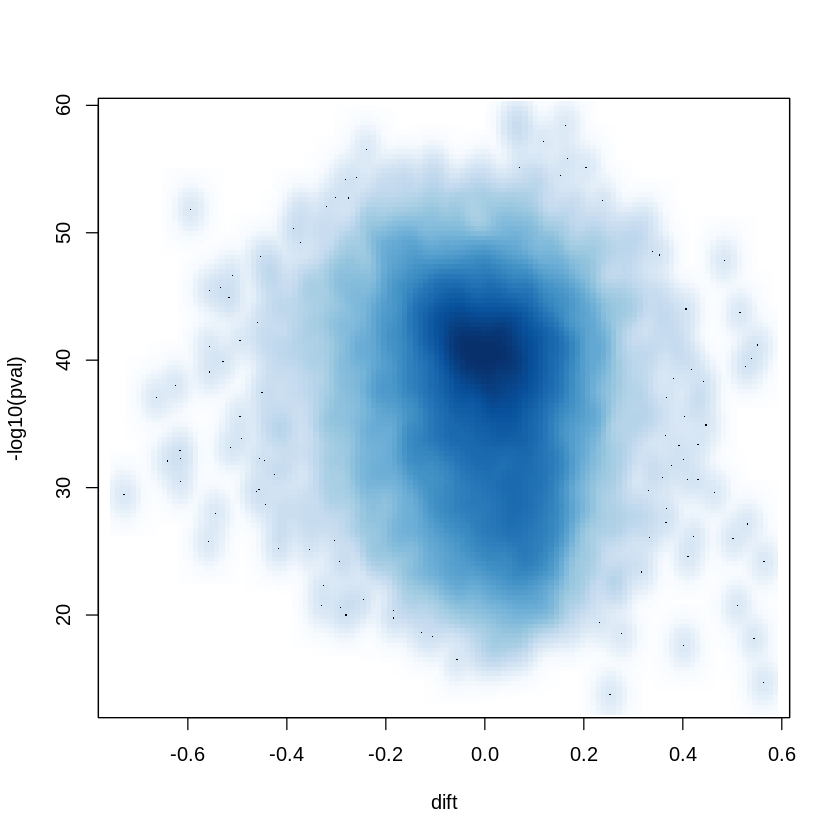

In [ ]:
library(RColorBrewer)

smoothScatter(dift, -log10(pval))

sum(pval < 0.05)
pvalBonf <- p.adjust(pval, method = "bonferroni" )

sum(pvalBonf < 0.05)

In [ ]:
design <- model.matrix(~group_normal_cancer)

fit <- eBayes(lmFit(expdtgeo_nc, design))

fit

An object of class "MArrayLM"
$coefficients
              (Intercept) group_normal_cancer
X206747_at       2.821573          0.00667309
X1569894_at      2.045858          0.09401534
X1568957_x_at    1.918280          0.25787281
X225863_s_at     2.878610          0.07307294
X222326_at       2.297939          0.29417980
13664 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
  (Intercept) group_normal_cancer
1  -6.9282032         -5.91784026
2   0.1443376         -2.44523346
3   0.1443376          0.05211735
4   0.1443376          0.05211735
5   0.1443376          0.05211735
43 more rows ...

$qraux
[1] 1.144338 1.052117

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 46 46 46 46 46
13664 more elements ...

$sigma
   X206747_at   X1569894_at X1568957_x_at  X225863_s_at    X222326_at 
   0.13369578    0.09705272    0.14614783    0.13774322    0.35835572 
13664 more elements ...

$cov.coefficients
                    (Intercept) group_normal_cancer
(Intercept)           

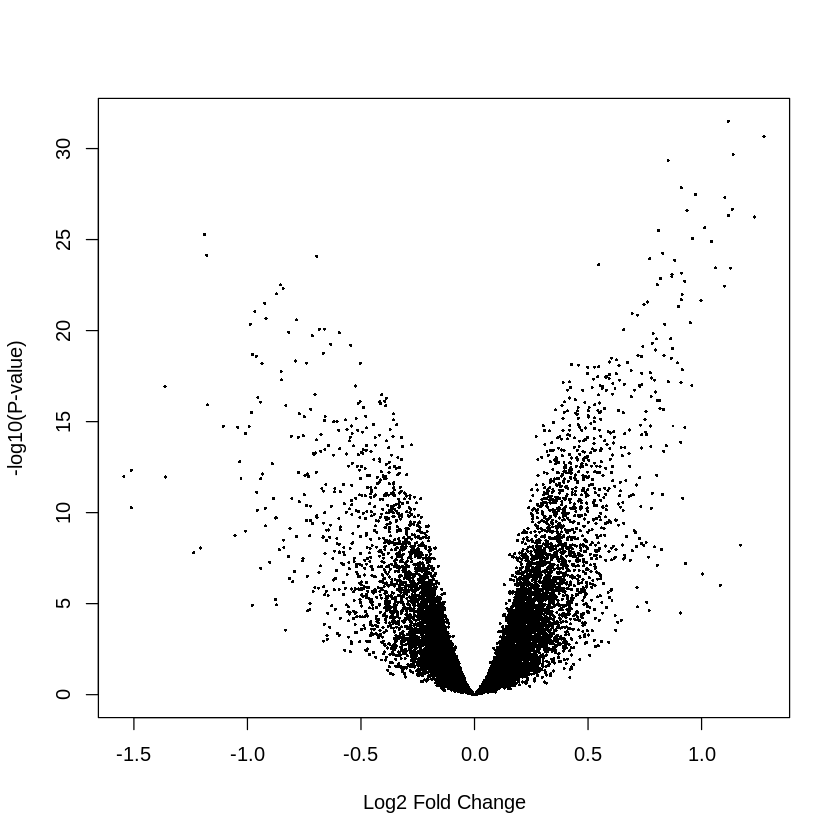

In [ ]:
volcanoplot(fit, coef=2)

In [ ]:
topResult_normal <- topTable(fit, coef=2, number=20)

rownames(topResult_normal)

[1] "X219918_s_at"  "X209773_s_at"  "X201291_s_at"  "X228273_at"   
 [5] "X210052_s_at"  "X203362_s_at"  "X222740_at"    "X229490_s_at" 
 [9] "X204825_at"    "X225687_at"    "X229128_s_at"  "X201890_at"   
[13] "X219787_s_at"  "X222717_at"    "X218039_at"    "X1552619_a_at"
[17] "X206364_at"    "X229839_at"    "X224061_at"    "X201663_s_at"

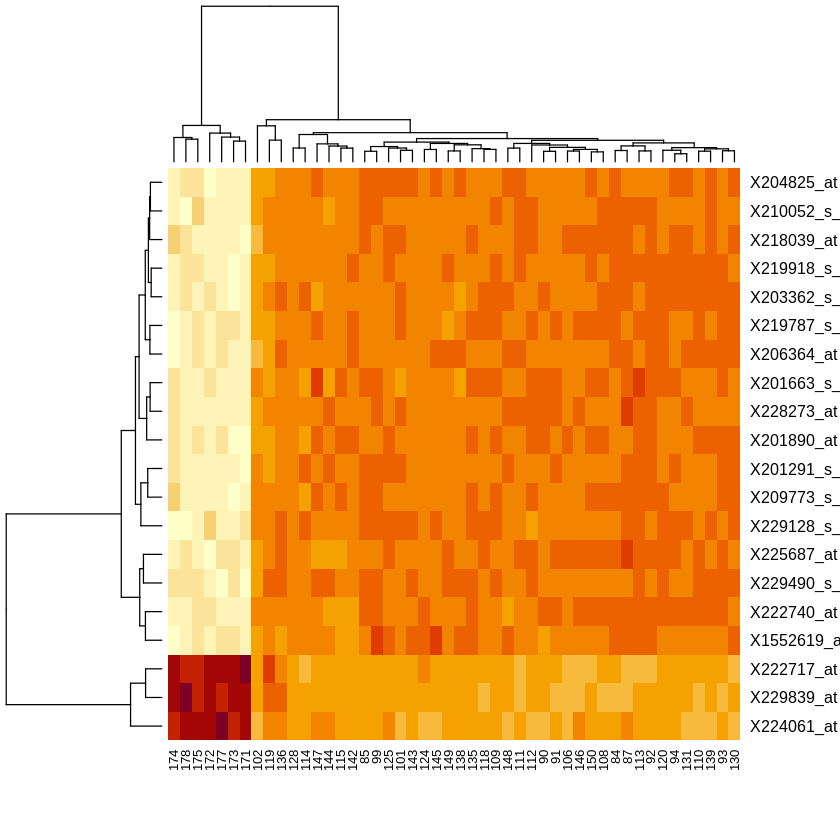

In [ ]:
selected <- rownames(expdtgeo_nc) %in% rownames(topResult_normal)
expdtgeosel <- expdtgeo_nc[selected, ]

heatmap(expdtgeosel)

Keterangan untuk axis group_subtype_cancer:

     0.0: normal

     1.0: basal

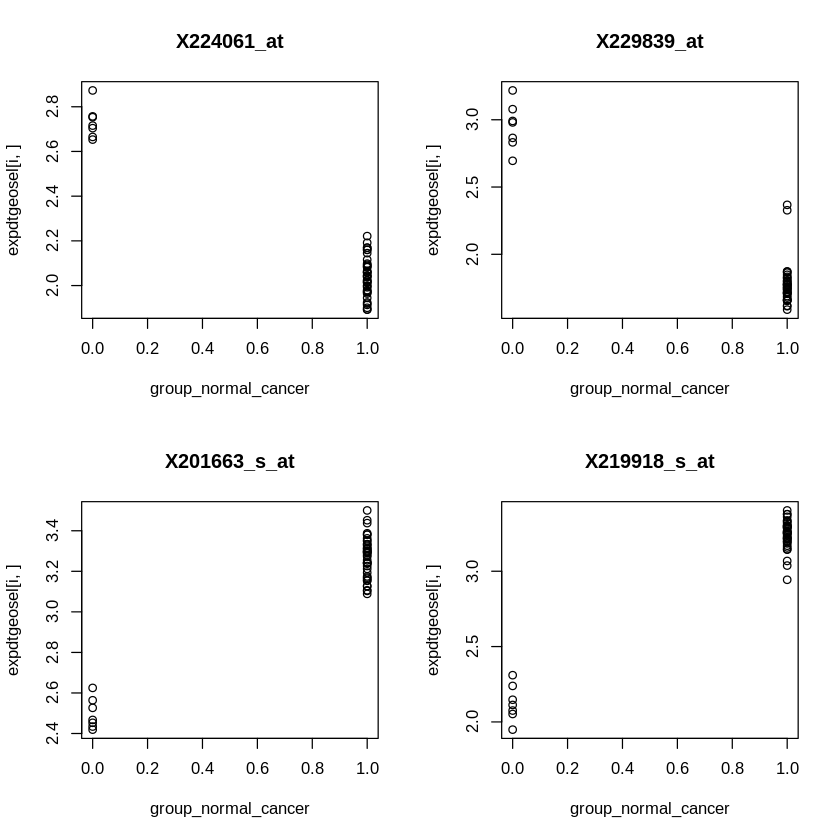

In [ ]:
par(mfrow=c(2,2))
for (i in 1:4) plot(group_normal_cancer, expdtgeosel[i,],
    main = rownames(expdtgeosel)[i])

cat("Keterangan untuk axis group_subtype_cancer:\n
     0.0: normal\n
     1.0: basal")

## gen normal v gen cancer luminal A

In [ ]:
normal_cancer_idx <- ifelse(vargrp %in% c('normal', 'luminal_A'), 0, 1)
normal_cancer <- vargrp[normal_cancer_idx == 0]

group_normal_cancer <- ifelse(normal_cancer == "normal", 0, 1)


cat("Kategori normal_cancer:\n")
normal_cancer
cat("\n")
cat("Grup normal_cancer:\n")
group_normal_cancer

Kategori normal_cancer:


[1] "normal"    "normal"    "normal"    "normal"    "normal"    "normal"   
 [7] "normal"    "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
[13] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
[19] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
[25] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
[31] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"


Grup normal_cancer:


[1] 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
expdtgeo_nc = expdtgeoFilt[, normal_cancer_idx==0]
head(expdtgeo_nc)

,171,172,173,174,175,177,178,180,181,184,⋯,221,222,223,224,225,228,231,232,234,235
X206747_at,2.714007,2.750805,2.805268,2.896679,2.840332,2.846690,2.897229,2.666423,2.715387,2.647554,⋯,2.871978,2.716829,2.604712,2.743159,2.603050,2.558289,2.720078,2.760169,2.737870,2.626329
X1569894_at,2.035906,2.017294,2.062814,2.056230,2.007935,2.011974,2.128853,2.218291,2.333908,2.241700,⋯,2.205854,2.022469,2.071813,2.027906,2.203898,2.235497,2.064459,2.165903,2.192226,2.318809
X1568957_x_at,1.992170,1.983114,1.955903,1.749439,1.950629,1.866450,1.930255,2.124569,2.174572,2.188827,⋯,1.825597,2.100388,2.138704,2.095613,2.243210,2.372730,2.191106,2.299536,2.098841,2.104097
X225863_s_at,3.223156,2.991927,2.915192,2.552780,2.762807,2.972907,2.731500,2.943004,2.757808,2.959972,⋯,2.985081,3.048025,2.714903,2.623007,2.796707,2.926695,2.814196,2.874054,2.771386,3.027158
X222326_at,1.890914,2.430213,2.457098,2.262843,2.457255,2.099031,2.488216,2.667176,2.374601,2.145678,⋯,2.691760,2.282185,2.310774,2.096136,2.643990,2.863337,2.099718,2.670624,2.091265,2.464763
X1567997_x_at,2.077475,2.376328,2.514693,2.566187,2.376874,2.321740,2.258999,2.685591,2.483619,2.651496,⋯,3.268661,2.850502,2.089493,2.688063,3.284955,2.798424,2.612629,3.228534,2.678325,2.899502


[1] 3.619475e-27

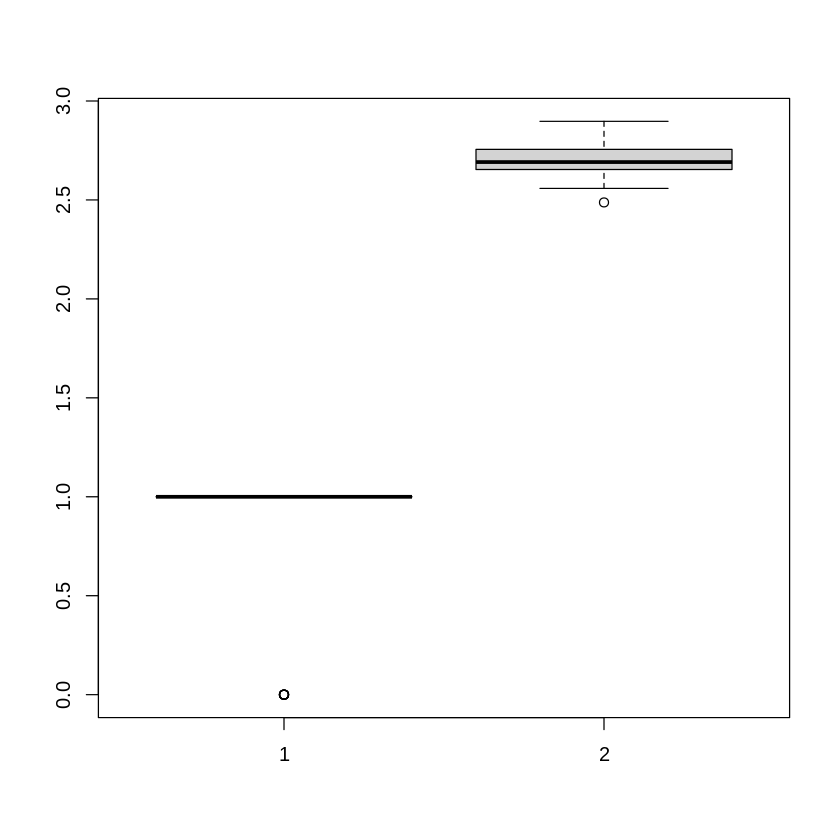

In [ ]:
t.test(group_normal_cancer, expdtgeo_nc[1,])$p.value
boxplot(group_normal_cancer, expdtgeo_nc[1,])

[1] 13669

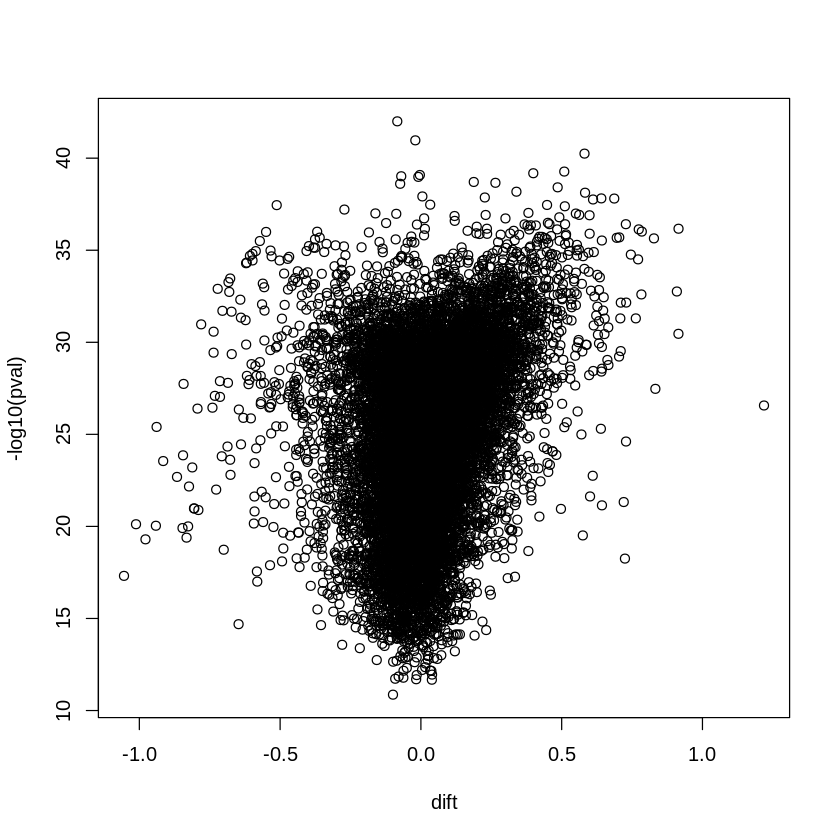

In [ ]:
pval <- apply(expdtgeo_nc, 1, function(x) t.test(group_normal_cancer, x)$p.value)
dift <- apply(expdtgeo_nc, 1, function(x) diff(t.test(x[1:7], x[7:36])$estimate))
plot(dift, -log10(pval))
sum(pval < 0.05)

[1] 13669

[1] 13669

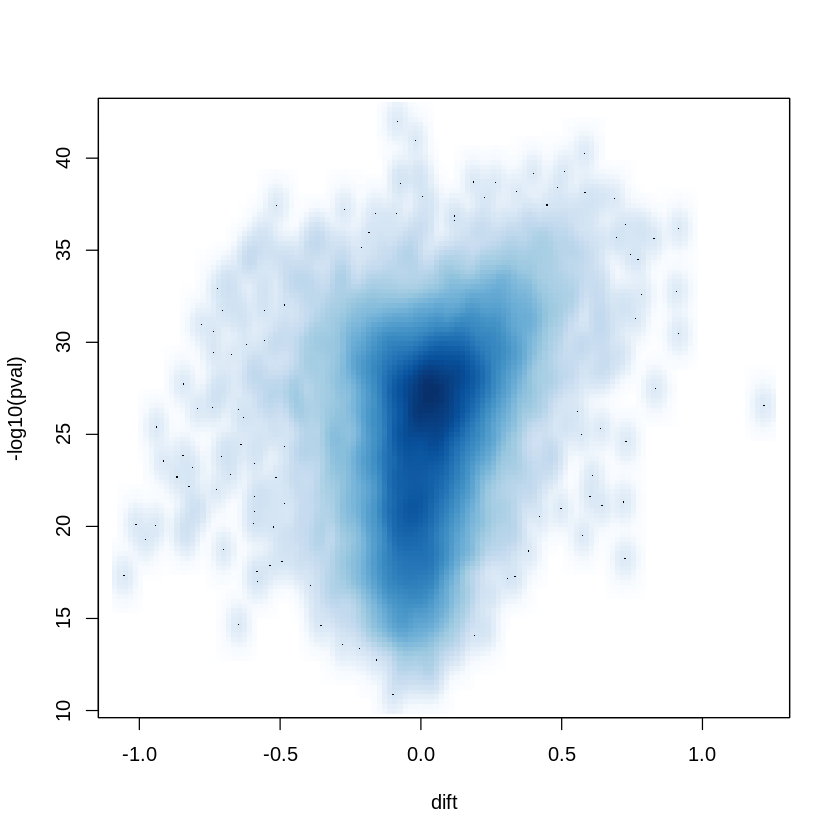

In [ ]:
library(RColorBrewer)

smoothScatter(dift, -log10(pval))

sum(pval < 0.05)
pvalBonf <- p.adjust(pval, method = "bonferroni" )

sum(pvalBonf < 0.05)

In [ ]:
design <- model.matrix(~group_normal_cancer)

fit <- eBayes(lmFit(expdtgeo_nc, design))

fit

An object of class "MArrayLM"
$coefficients
              (Intercept) group_normal_cancer
X206747_at       2.821573        -0.139240763
X1569894_at      2.045858         0.086283707
X1568957_x_at    1.918280         0.206664028
X225863_s_at     2.878610         0.007683818
X222326_at       2.297939         0.039906692
13664 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
  (Intercept) group_normal_cancer
1  -6.0000000          -4.8333333
2   0.1666667           2.3746345
3   0.1666667           0.2907716
4   0.1666667           0.2907716
5   0.1666667           0.2907716
31 more rows ...

$qraux
[1] 1.166667 1.290772

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 34 34 34 34 34
13664 more elements ...

$sigma
   X206747_at   X1569894_at X1568957_x_at  X225863_s_at    X222326_at 
   0.07567692    0.09672800    0.11961128    0.14060147    0.29515897 
13664 more elements ...

$cov.coefficients
                    (Intercept) group_normal_cancer
(Intercept)           

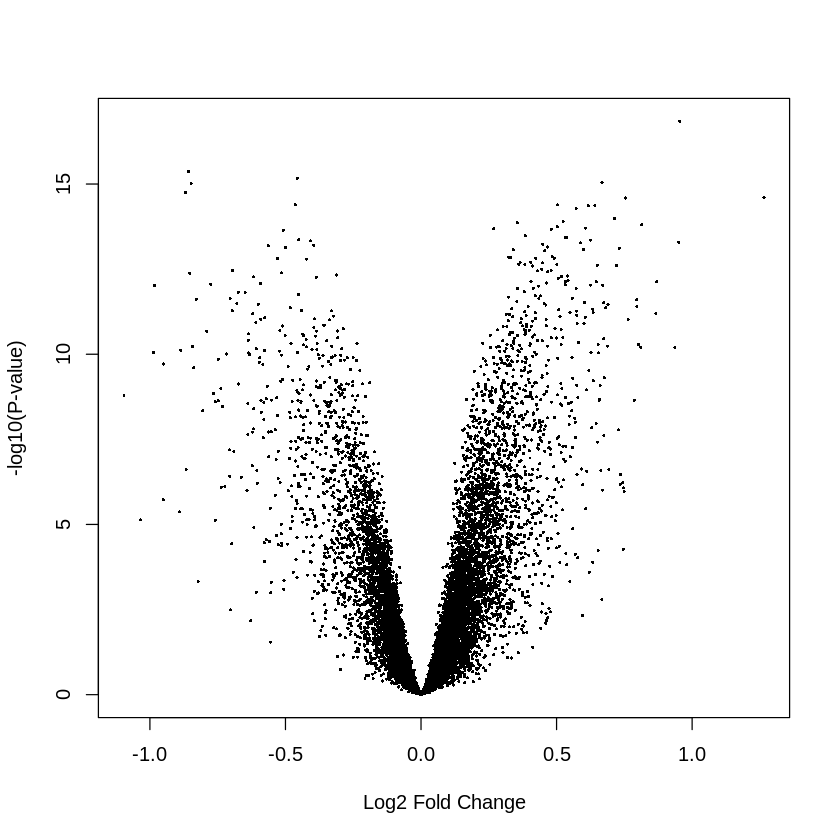

In [ ]:
volcanoplot(fit, coef=2)

In [ ]:
topResult_normal <- topTable(fit, coef=2, number=20)

rownames(topResult_normal)

[1] "X215646_s_at"  "X1561754_at"   "X234657_at"    "X212353_at"   
 [5] "X1558170_at"   "X224012_at"    "X224396_s_at"  "X201688_s_at" 
 [9] "X229116_at"    "X1558254_s_at" "X217777_s_at"  "X1556006_s_at"
[13] "X207265_s_at"  "X227140_at"    "X1554747_a_at" "X217919_s_at" 
[17] "X237086_at"    "X211612_s_at"  "X1555778_a_at" "X222981_s_at"

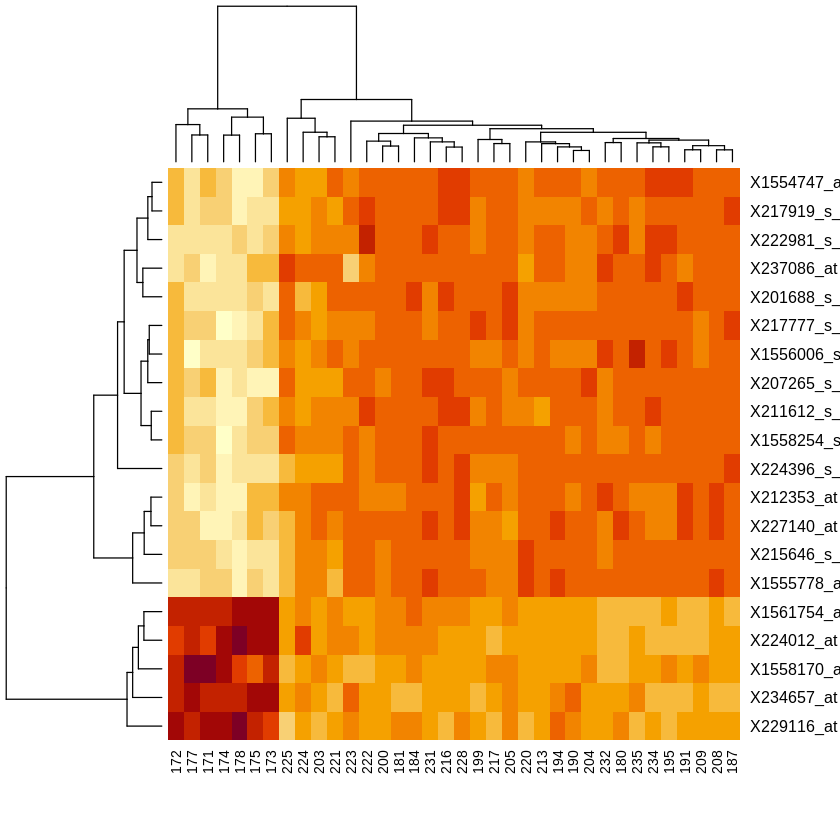

In [ ]:
selected <- rownames(expdtgeo_nc) %in% rownames(topResult_normal)
expdtgeosel <- expdtgeo_nc[selected, ]

heatmap(expdtgeosel)

Keterangan untuk axis group_subtype_cancer:

     0.0: normal

     1.0: luminal_A

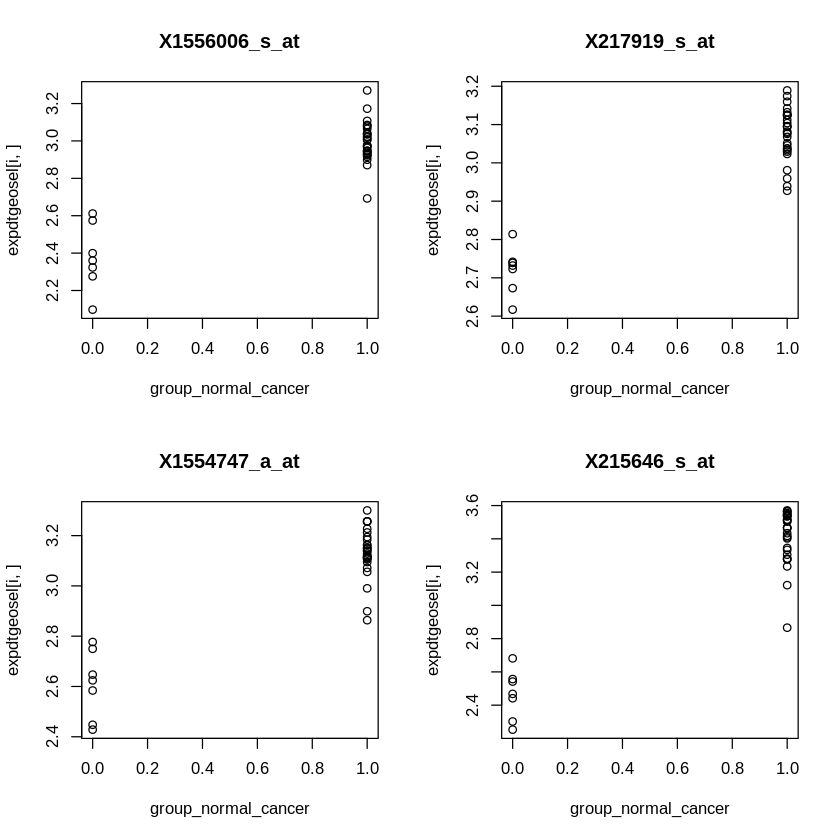

In [ ]:
par(mfrow=c(2,2))
for (i in 1:4) plot(group_normal_cancer, expdtgeosel[i,],
    main = rownames(expdtgeosel)[i])

cat("Keterangan untuk axis group_subtype_cancer:\n
     0.0: normal\n
     1.0: luminal_A")

## gen normal v gen cancer luminal B

In [ ]:
normal_cancer_idx <- ifelse(vargrp %in% c('normal', 'luminal_B'), 0, 1)
normal_cancer <- vargrp[normal_cancer_idx == 0]

group_normal_cancer <- ifelse(normal_cancer == "normal", 0, 1)

cat("Kategori normal_cancer:\n")
normal_cancer
cat("\n")
cat("Grup normal_cancer:\n")
group_normal_cancer

Kategori normal_cancer:


[1] "normal"    "normal"    "normal"    "normal"    "normal"    "normal"   
 [7] "normal"    "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[13] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[19] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[25] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[31] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[37] "luminal_B"


Grup normal_cancer:


[1] 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [ ]:
expdtgeo_nc = expdtgeoFilt[, normal_cancer_idx==0]
head(expdtgeo_nc)

,171,172,173,174,175,177,178,182,183,185,⋯,218,219,226,227,229,230,233,236,237,238
X206747_at,2.714007,2.750805,2.805268,2.896679,2.840332,2.846690,2.897229,2.773926,2.652513,2.648200,⋯,2.585648,2.512603,2.621050,2.710261,2.580552,2.602701,2.656772,2.524326,2.612766,2.544801
X1569894_at,2.035906,2.017294,2.062814,2.056230,2.007935,2.011974,2.128853,2.132896,2.095874,2.044752,⋯,2.192286,2.194825,2.154624,2.238419,2.211849,2.202991,2.204758,2.088863,2.155937,2.100702
X1568957_x_at,1.992170,1.983114,1.955903,1.749439,1.950629,1.866450,1.930255,2.036516,2.153070,1.932202,⋯,2.046272,2.190031,2.068318,2.067782,2.453915,2.019955,2.165550,2.345627,2.237803,2.128872
X225863_s_at,3.223156,2.991927,2.915192,2.552780,2.762807,2.972907,2.731500,2.971355,3.085493,2.949693,⋯,3.011015,2.979569,2.993018,2.973859,2.999824,2.792327,2.935459,2.963615,2.824416,2.845670
X222326_at,1.890914,2.430213,2.457098,2.262843,2.457255,2.099031,2.488216,2.771480,2.279423,2.435802,⋯,2.664826,2.841296,2.144857,2.617518,2.210780,2.459534,2.089733,2.411535,2.365938,2.208355
X1567997_x_at,2.077475,2.376328,2.514693,2.566187,2.376874,2.321740,2.258999,2.272443,2.626032,2.366418,⋯,2.334906,2.405866,2.984212,2.083547,2.351992,2.327427,2.998348,2.006181,2.610614,2.572016


[1] 7.804079e-28

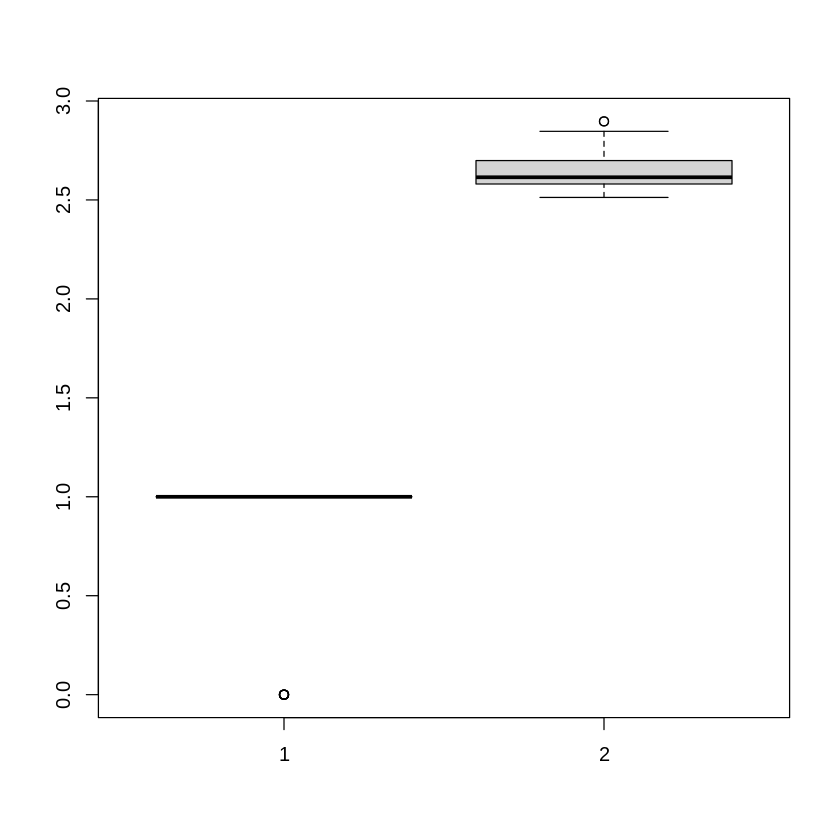

In [ ]:
t.test(group_normal_cancer, expdtgeo_nc[1,])$p.value
boxplot(group_normal_cancer, expdtgeo_nc[1,])

[1] 13669

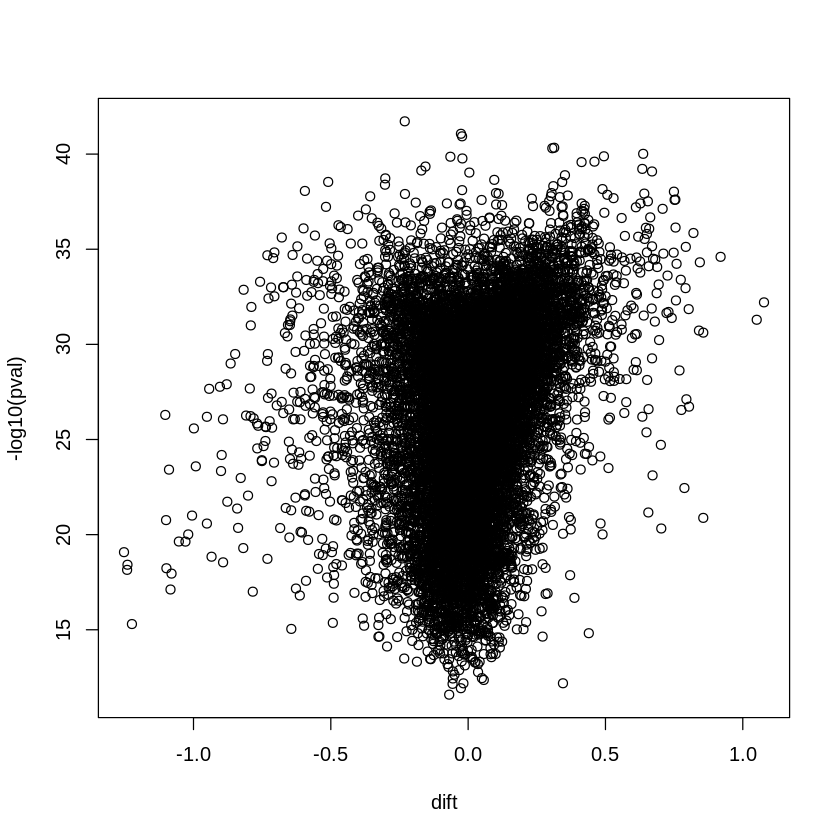

In [ ]:
pval <- apply(expdtgeo_nc, 1, function(x) t.test(group_normal_cancer, x)$p.value)
dift <- apply(expdtgeo_nc, 1, function(x) diff(t.test(x[1:7], x[7:30])$estimate))
plot(dift, -log10(pval))
sum(pval < 0.05)

[1] 13669

[1] 13669

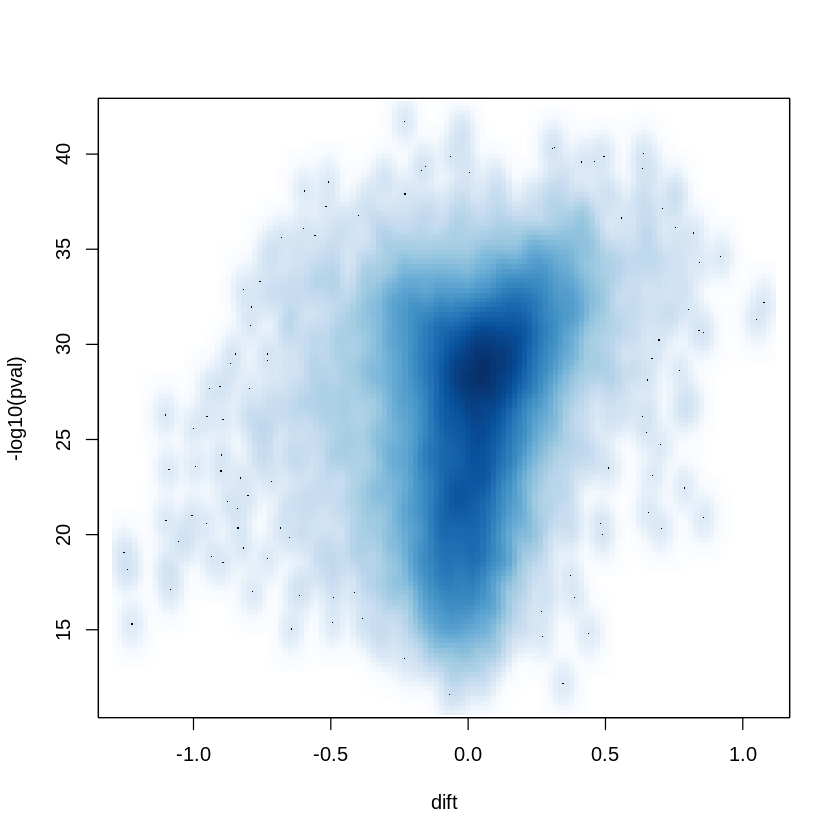

In [ ]:
library(RColorBrewer)

smoothScatter(dift, -log10(pval))

sum(pval < 0.05)
pvalBonf <- p.adjust(pval, method = "bonferroni" )

sum(pvalBonf < 0.05)

In [ ]:
design <- model.matrix(~group_normal_cancer)

fit <- eBayes(lmFit(expdtgeo_nc, design))

fit

An object of class "MArrayLM"
$coefficients
              (Intercept) group_normal_cancer
X206747_at       2.821573         -0.21525807
X1569894_at      2.045858          0.09040279
X1568957_x_at    1.918280          0.17680633
X225863_s_at     2.878610          0.03260911
X222326_at       2.297939         -0.03716640
13664 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
  (Intercept) group_normal_cancer
1   -6.082763          -4.9319696
2    0.164399           2.3823677
3    0.164399           0.2922866
4    0.164399           0.2922866
5    0.164399           0.2922866
32 more rows ...

$qraux
[1] 1.164399 1.292287

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 35 35 35 35 35
13664 more elements ...

$sigma
   X206747_at   X1569894_at X1568957_x_at  X225863_s_at    X222326_at 
   0.06041175    0.06605981    0.15550433    0.12835679    0.29192848 
13664 more elements ...

$cov.coefficients
                    (Intercept) group_normal_cancer
(Intercept)           

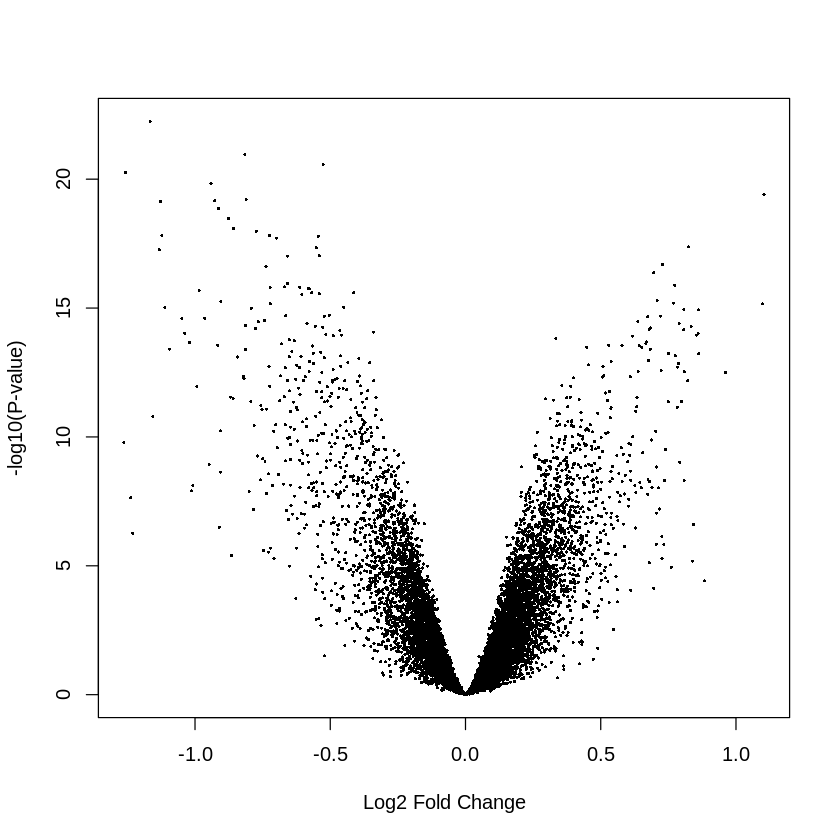

In [ ]:
volcanoplot(fit, coef=2)

In [ ]:
topResult_normal <- topTable(fit, coef=2, number=20)

rownames(topResult_normal)

[1] "X214087_s_at" "X214063_s_at" "X234657_at"   "X202035_s_at" "X224012_at"  
 [6] "X209773_s_at" "X228653_at"   "X206742_at"   "X229839_at"   "X1561754_at" 
[11] "X224191_x_at" "X231535_x_at" "X236359_at"   "X206093_x_at" "X223623_at"  
[16] "X206560_s_at" "X207016_s_at" "X218039_at"   "X239218_at"   "X221796_at"

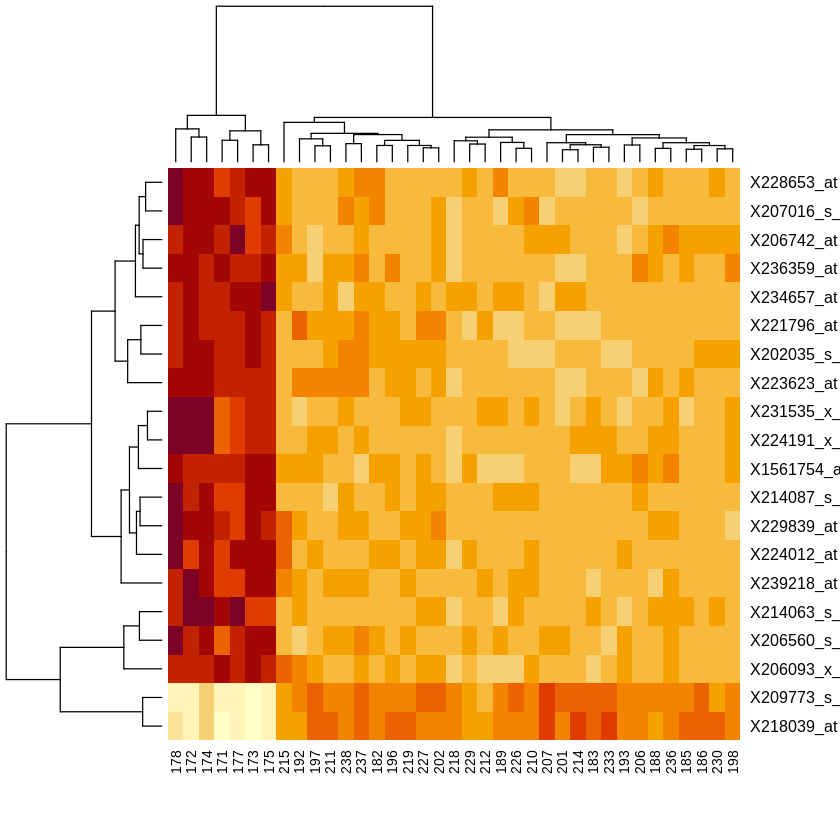

In [ ]:
selected <- rownames(expdtgeo_nc) %in% rownames(topResult_normal)
expdtgeosel <- expdtgeo_nc[selected, ]

heatmap(expdtgeosel)

Keterangan untuk axis group_subtype_cancer:

     0.0: normal

     1.0: luminal_B

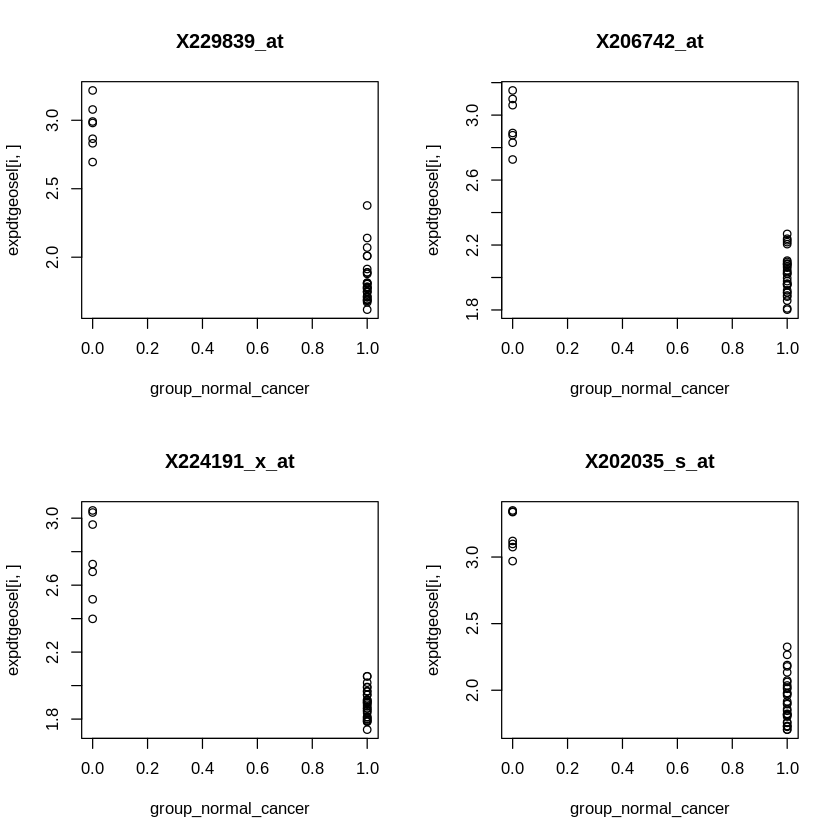

In [ ]:
par(mfrow=c(2,2))
for (i in 1:4) plot(group_normal_cancer, expdtgeosel[i,],
    main = rownames(expdtgeosel)[i])

cat("Keterangan untuk axis group_subtype_cancer:\n
     0.0: normal\n
     1.0: luminal_B")

## gen normal v gen cancer

In [ ]:
gene_idx <- ifelse(vargrp %in% c('normal', 'basal', 'HER', 'luminal_A', 'luminal_B'),
                         0, 1)
gene <- vargrp[gene_idx == 0]

group_gene <- ifelse(gene == "normal", 0,
                       ifelse(gene == "basal", 1,
                              ifelse(gene == "HER", 2,
                                     ifelse(gene == "luminal_A", 3, 4))))
cat("Kategori gen:\n")
gene
cat("\n")
cat("Grup gen:\n")
group_gene

Kategori gen:


[1] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
  [7] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [13] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [19] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [25] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [31] "basal"     "basal"     "basal"     "basal"     "basal"     "basal"    
 [37] "basal"     "basal"     "basal"     "basal"     "basal"     "HER"      
 [43] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [49] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [55] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [61] "HER"       "HER"       "HER"       "HER"       "HER"       "HER"      
 [67] "HER"       "HER"       "HER"       "HER"       "HER"       "normal"   
 [73] "normal"    "normal"    "normal"    "normal"    "normal"    "normal"   
 [79] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
 [85] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
 [91] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
 [97] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A"
[103] "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_A" "luminal_B"
[109] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[115] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[121] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[127] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"
[133] "luminal_B" "luminal_B" "luminal_B" "luminal_B" "luminal_B"


Grup gen:


[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 [75] 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4

In [ ]:
expdtgeo_nc = expdtgeoFilt[, gene_idx==0]
head(expdtgeo_nc)

,84,85,87,90,91,92,93,94,99,101,⋯,218,219,226,227,229,230,233,236,237,238
X206747_at,2.836814,2.557225,2.612473,2.850373,2.791162,2.605773,3.168963,2.792524,2.781440,2.841759,⋯,2.585648,2.512603,2.621050,2.710261,2.580552,2.602701,2.656772,2.524326,2.612766,2.544801
X1569894_at,2.023652,2.014288,2.202421,1.929867,2.154122,2.118655,2.038325,1.917902,2.130277,2.048496,⋯,2.192286,2.194825,2.154624,2.238419,2.211849,2.202991,2.204758,2.088863,2.155937,2.100702
X1568957_x_at,2.289747,2.170657,2.183637,2.175850,2.177284,2.629625,2.356201,2.393496,2.283426,2.104017,⋯,2.046272,2.190031,2.068318,2.067782,2.453915,2.019955,2.165550,2.345627,2.237803,2.128872
X225863_s_at,3.101780,3.044453,2.991648,3.116145,3.045576,3.045698,3.089326,3.099421,3.015979,3.028218,⋯,3.011015,2.979569,2.993018,2.973859,2.999824,2.792327,2.935459,2.963615,2.824416,2.845670
X222326_at,3.244146,3.106944,2.402531,2.549274,2.627179,2.493806,2.216407,2.889964,2.433534,2.947988,⋯,2.664826,2.841296,2.144857,2.617518,2.210780,2.459534,2.089733,2.411535,2.365938,2.208355
X1567997_x_at,1.958072,1.904884,2.105247,2.001128,2.105797,2.043259,2.100294,1.894772,1.912652,1.908888,⋯,2.334906,2.405866,2.984212,2.083547,2.351992,2.327427,2.998348,2.006181,2.610614,2.572016


In [ ]:
design <- model.matrix(~group_gene)

fit <- eBayes(lmFit(expdtgeo_nc, design))

fit

An object of class "MArrayLM"
$coefficients
              (Intercept)   group_gene
X206747_at       2.874598 -0.066538222
X1569894_at      2.132193  0.003973406
X1568957_x_at    2.136735 -0.004890247
X225863_s_at     2.927955 -0.008721513
X222326_at       2.693759 -0.092978822
13664 more rows ...

$rank
[1] 2

$assign
[1] 0 1

$qr
$qr
   (Intercept)   group_gene
1 -11.70469991 -26.31421586
2   0.08543577  14.47625793
3   0.08543577   0.07943559
4   0.08543577   0.07943559
5   0.08543577   0.07943559
132 more rows ...

$qraux
[1] 1.085436 1.079436

$pivot
[1] 1 2

$tol
[1] 1e-07

$rank
[1] 2


$df.residual
[1] 135 135 135 135 135
13664 more elements ...

$sigma
   X206747_at   X1569894_at X1568957_x_at  X225863_s_at    X222326_at 
    0.1158754     0.0987709     0.1507560     0.1269660     0.3446580 
13664 more elements ...

$cov.coefficients
            (Intercept)   group_gene
(Intercept)  0.03141762 -0.010727969
group_gene  -0.01072797  0.004771856

$stdev.unscaled
              (Int

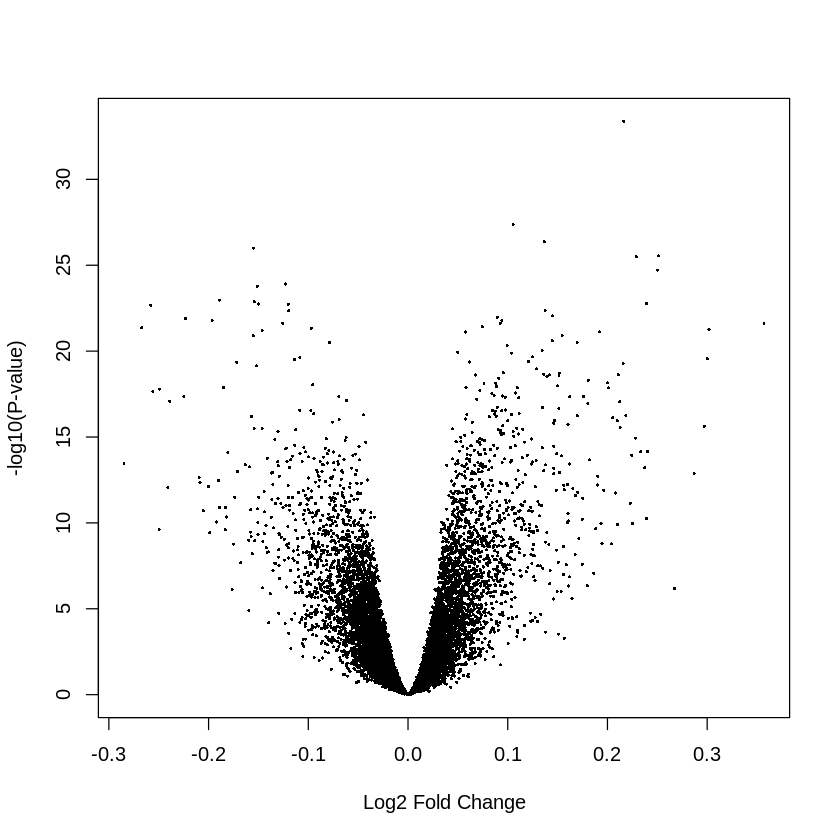

In [ ]:
volcanoplot(fit, coef=2)

In [ ]:
topResult <- topTable(fit, coef=2, number=20)

rownames(topResult)

[1] "X210085_s_at" "X218394_at"   "X223103_at"   "X209169_at"   "X204508_s_at"
 [6] "X210735_s_at" "X233388_at"   "X223437_at"   "X210347_s_at" "X225421_at"  
[11] "X209170_s_at" "X226961_at"   "X225431_x_at" "X244414_at"   "X219497_s_at"
[16] "X232078_at"   "X239715_at"   "X229082_at"   "X208682_s_at" "X231969_at"

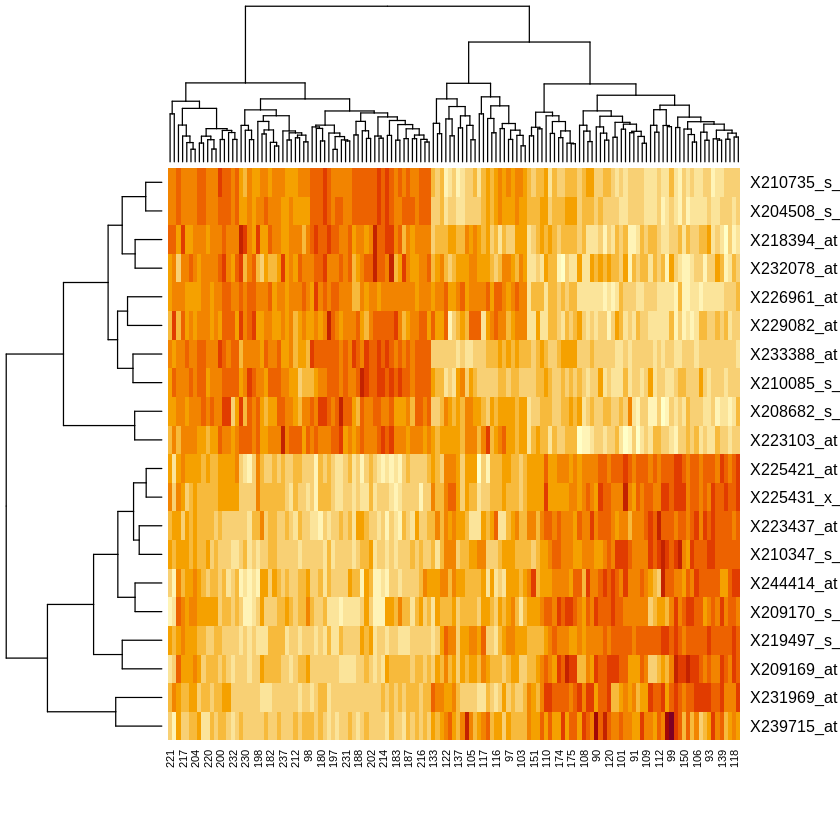

In [ ]:
selected <- rownames(expdtgeo_nc) %in% rownames(topResult)
expdtgeosel <- expdtgeo_nc[selected, ]

heatmap(expdtgeosel)

Keterangan untuk axis group_subtype_cancer:

     0.0: normal

     1.0: basal

     2.0: HER

     3.0: luminal_A

     4.0: luminal_B

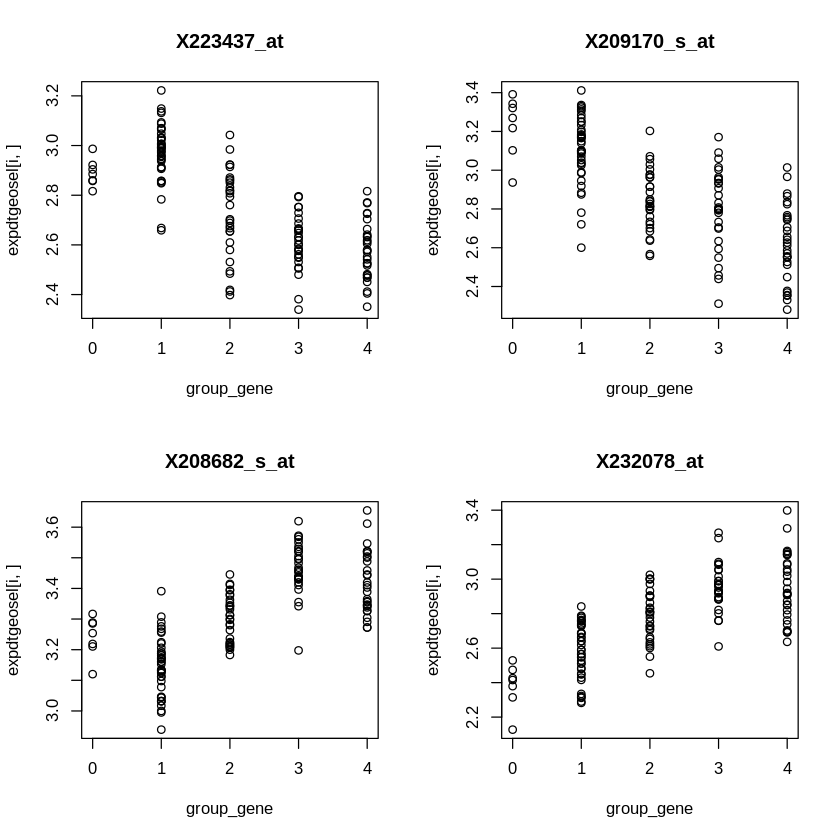

In [ ]:
par(mfrow=c(2,2))
for (i in 1:4) plot(group_gene, expdtgeosel[i,],
    main = rownames(expdtgeosel)[i])

cat("Keterangan untuk axis group_subtype_cancer:\n
     0.0: normal\n
     1.0: basal\n
     2.0: HER\n
     3.0: luminal_A\n
     4.0: luminal_B")